**Practica 1 de laboratorio**

*Formula del área de la elipse*
$$A(a, b) = \frac{a}{2} \frac{b}{2} \pi $$

*Formula de la propagación de errores*

$$\sigma_A = \bigg[ \bigg( \frac{dA}{da} \Bigg|_{a_0,\space b_0} \sigma_a \bigg)^2 + \bigg( \frac{dA}{db} \Bigg|_{a_0, \space b_0} \sigma_b \bigg)^2 \bigg]^{\frac{1}{2}}
$$
$$ \sigma_A = \bigg[ \bigg( \frac{1}{4} b_0 \pi \bigg)^2\sigma_b + \bigg( \frac{1}{4} a_0 \pi \bigg)^2\sigma_a \bigg]^{\frac{1}{2}}

In [127]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('pr1.mplstyle')

In [128]:
df = pd.read_csv('leaves.csv')

cA = df[df['class'] == 'A']
cB = df[df['class'] == 'B']
cC = df[df['class'] == 'C']
cD = df[df['class'] == 'D']
cE = df[df['class'] == 'E']

print(cA)

  class  id    weight  length  width         area
0     A   1  0.470000      66     29  1503.252085
1     A   2  0.456667      59     32  1482.831732
2     A   3  0.300000      63     25  1237.002107
3     A   4  0.236667      53     23   957.400361
4     A   5  0.370000      58     33  1503.252085


**Punto 1** 

***Plot masa vs largo, ancho y área***

Regresión lineal para cada tipo de hoja y una general

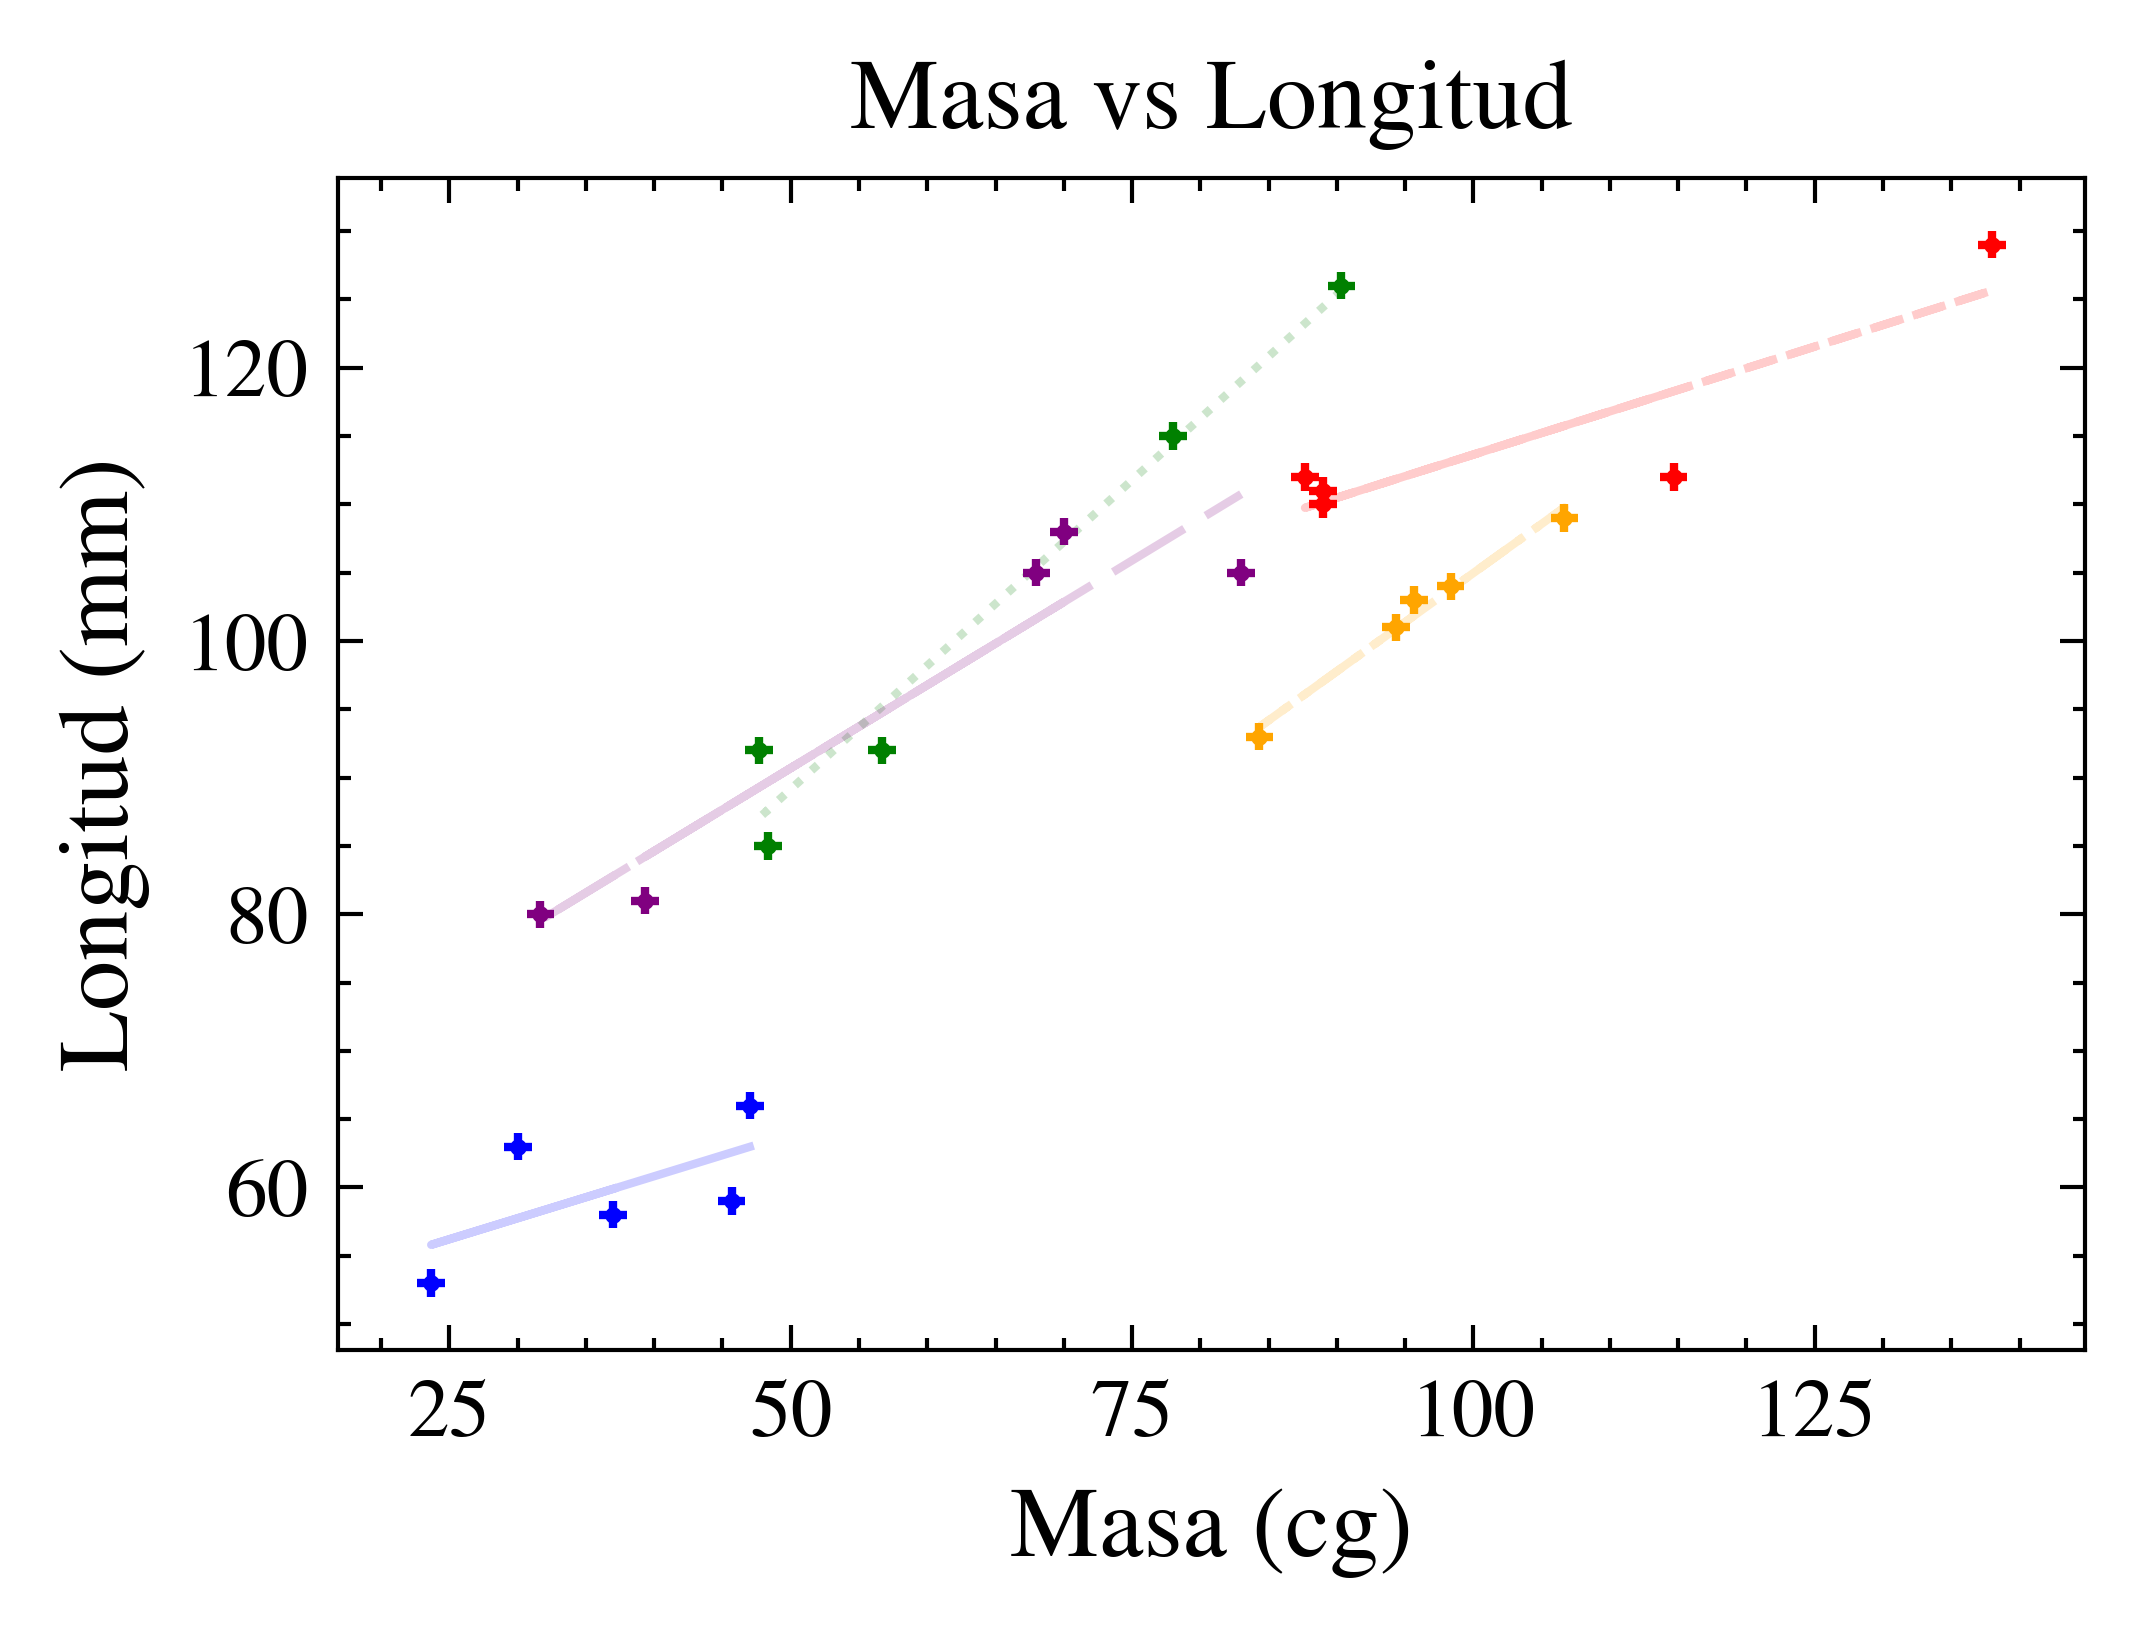

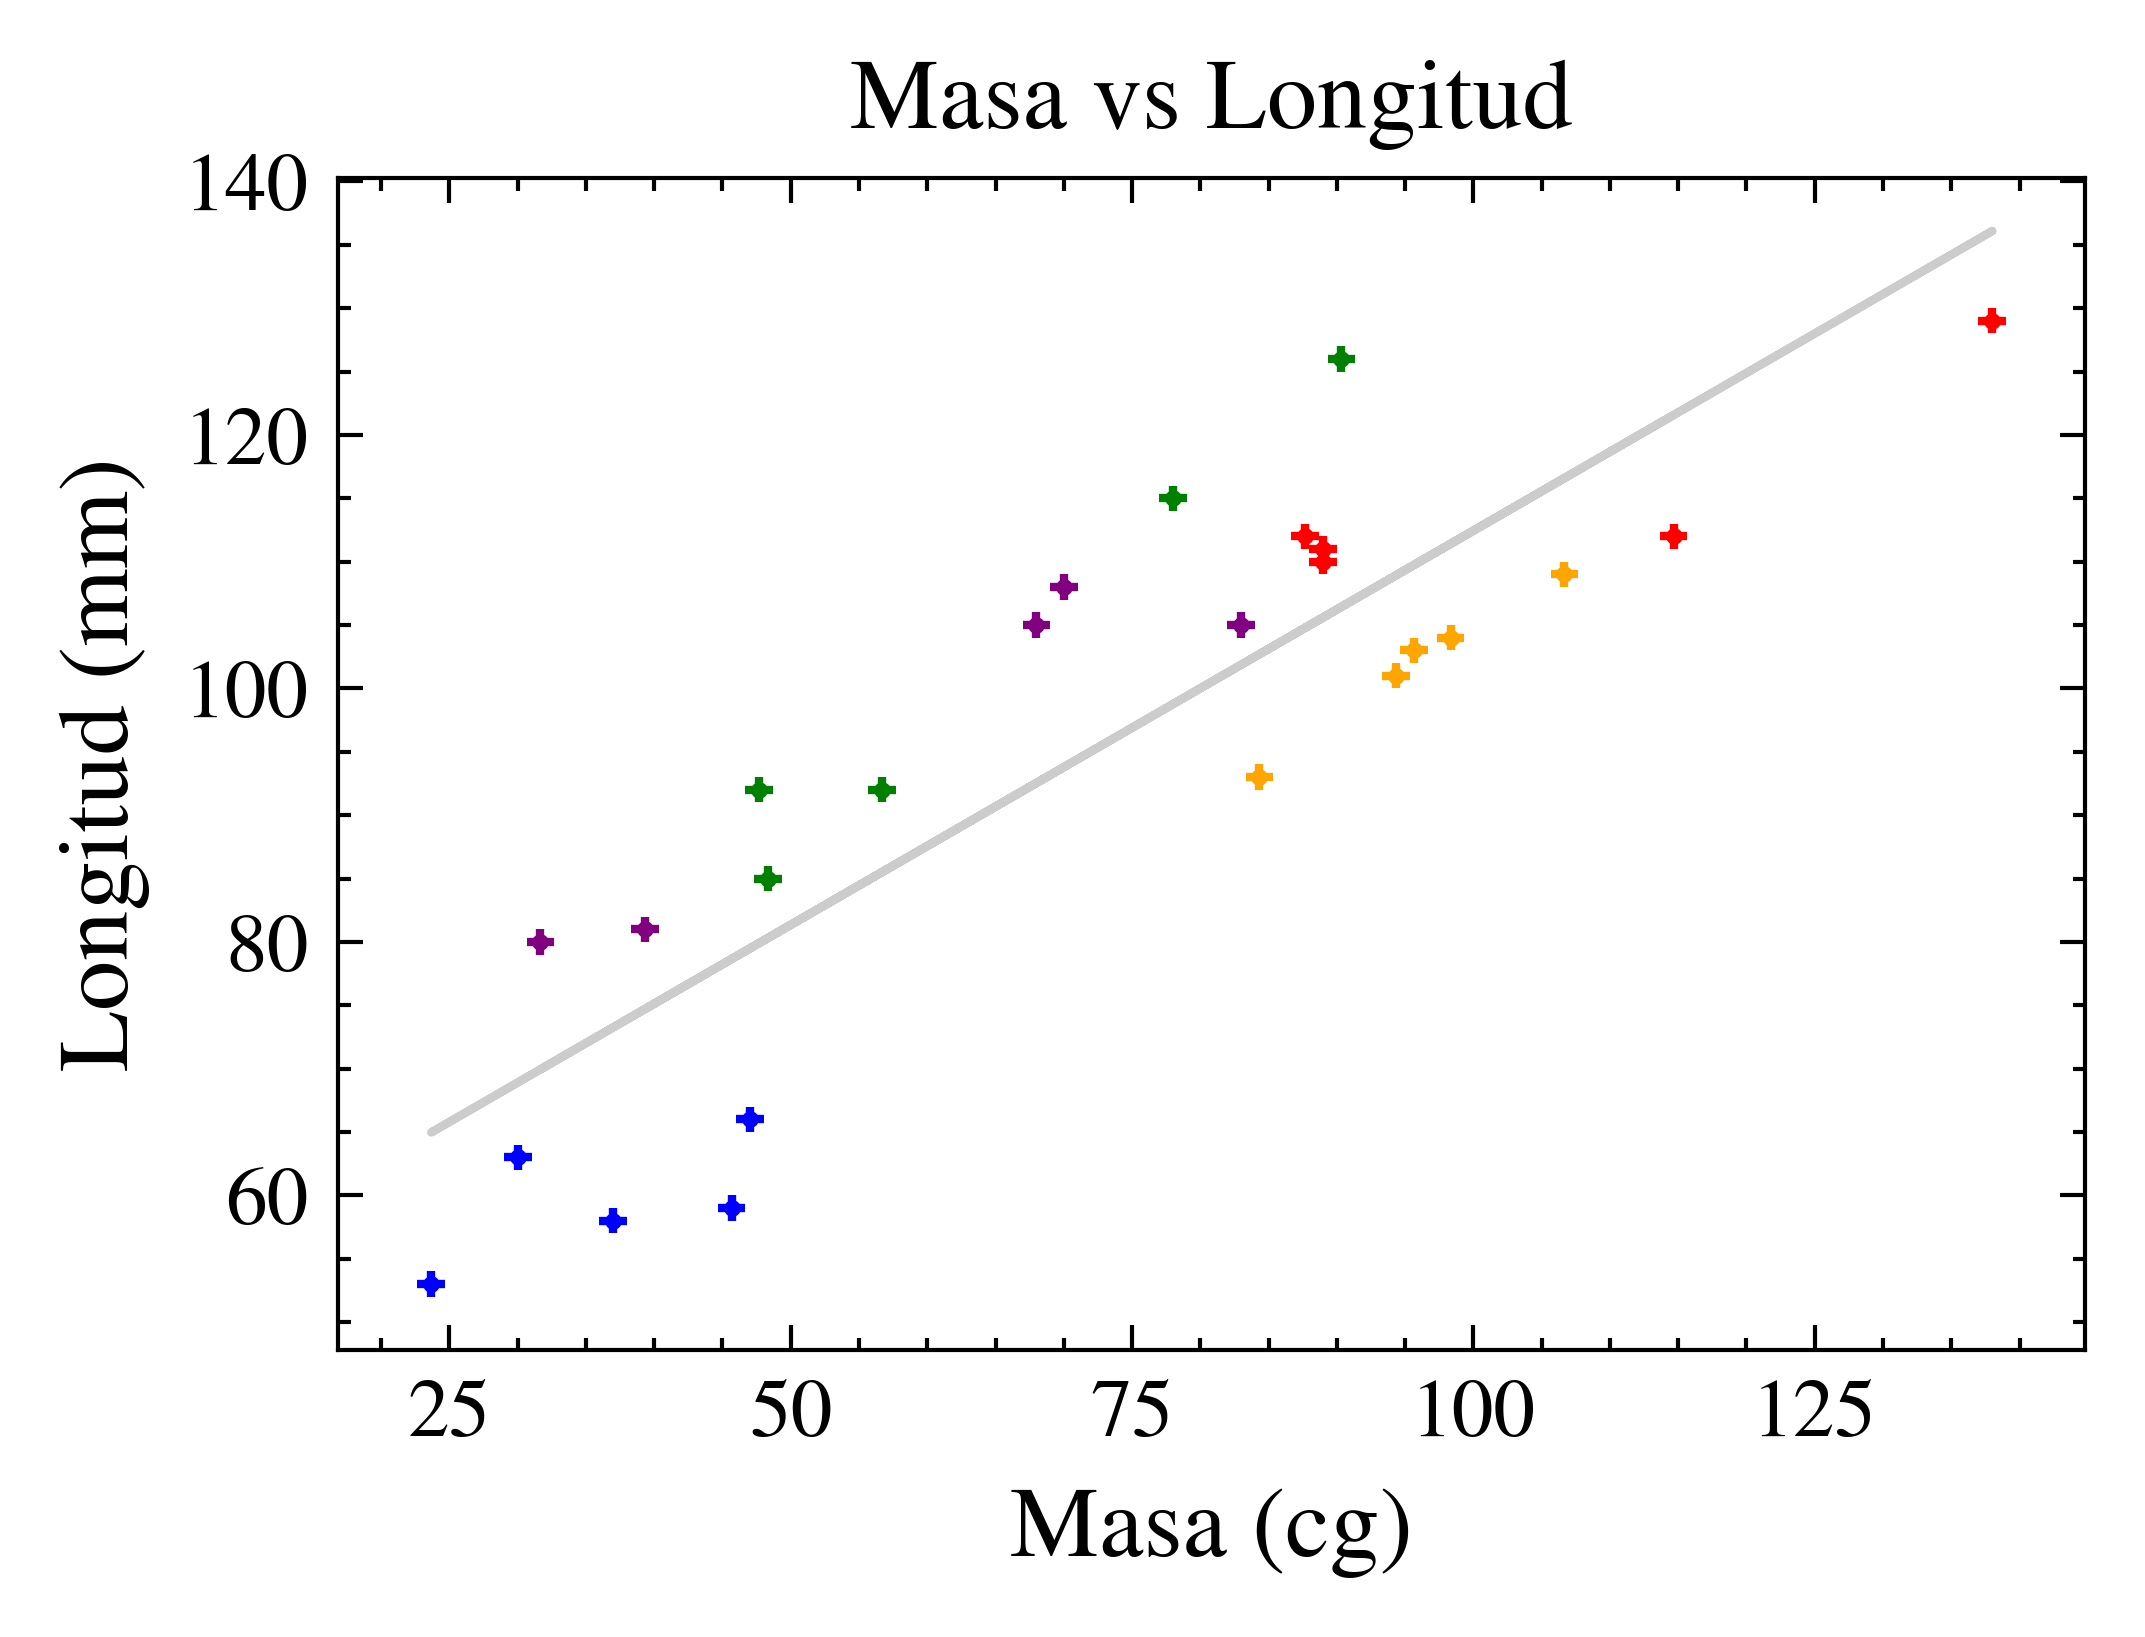

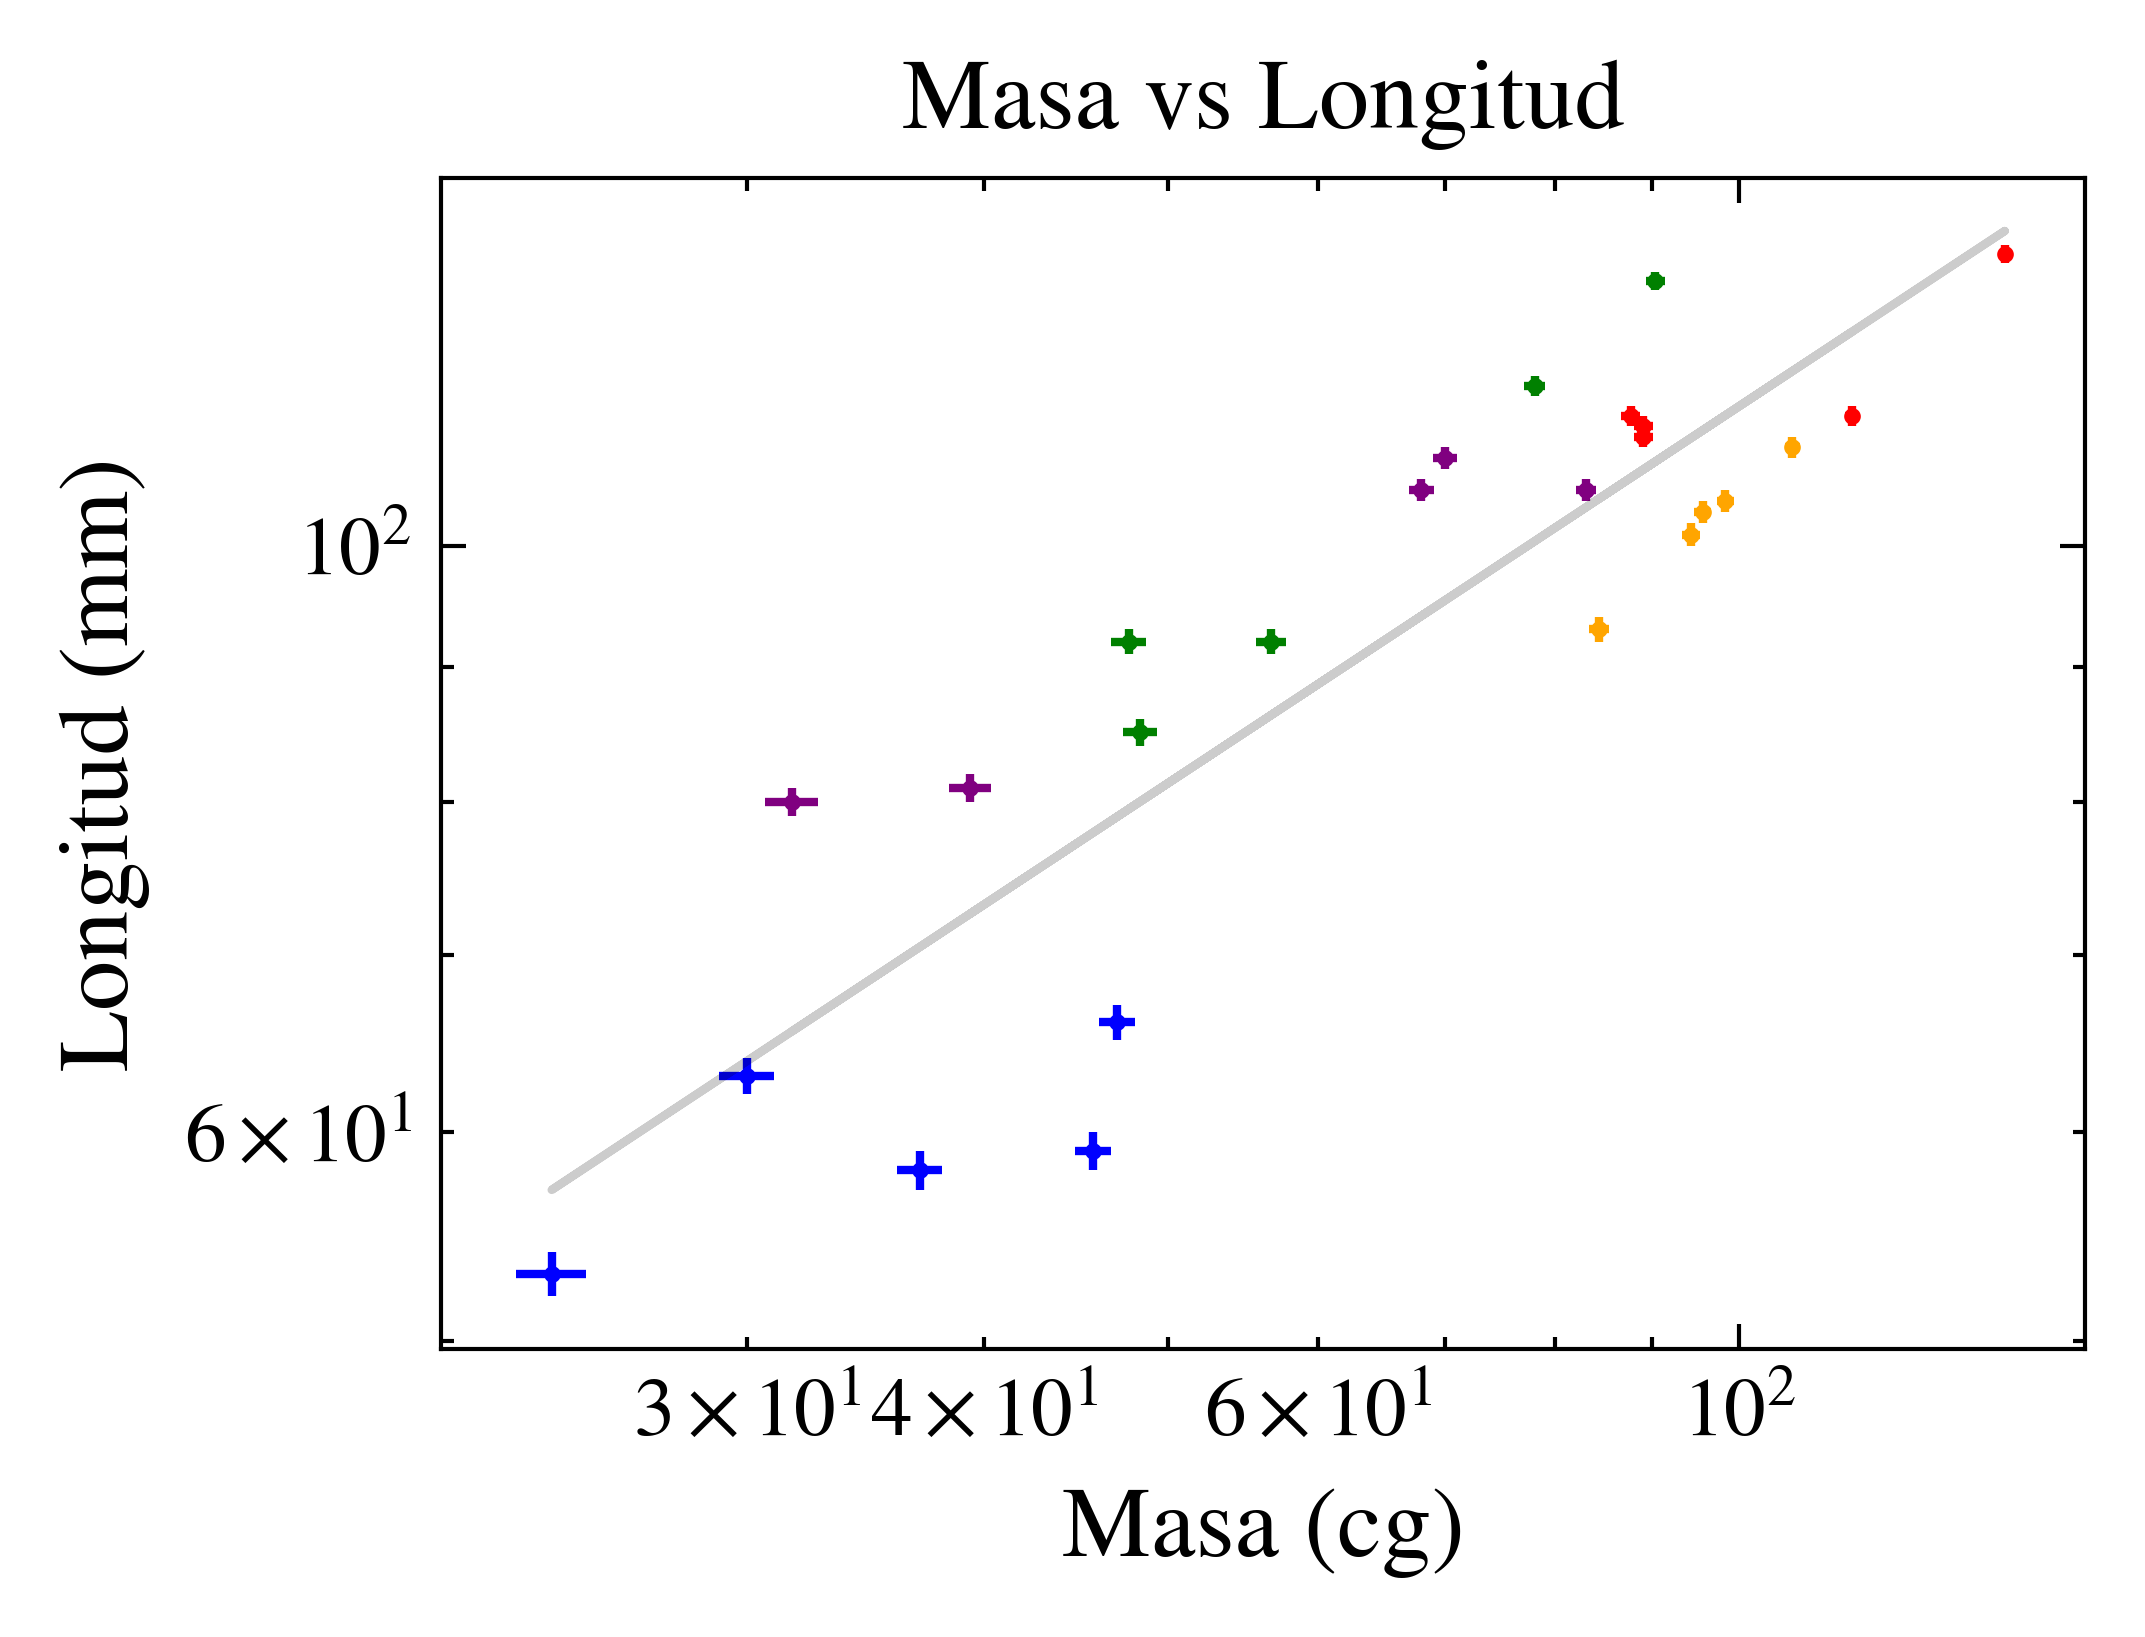

In [129]:
diameter_points = 1
tol = 1
sistematicWeightError = (3* (0.1**2))**0.5
sigmaWeightMeanError = 1

clases = [(cA, 'Class A', 'blue'), (cB, 'Class B','green'), (cC, 'Class C', 'red'), (cD, 'Class D', 'orange'), (cE, 'Class E', 'purple')]
for clase in clases:
    massError = (sistematicWeightError**2 + sigmaWeightMeanError**2)**0.5
    plt.errorbar(clase[0]['weight']*100, clase[0]['length'], xerr=massError, yerr=tol, fmt='o', label=clase[1], ms=diameter_points, color=clase[2], alpha=1)
    regression_coeffs = np.polyfit(clase[0]['weight']*100, clase[0]['length'], 1)
    regression_line = np.polyval(regression_coeffs, clase[0]['weight']*100)
    plt.plot(clase[0]['weight']*100, regression_line, label='Regresión lineal', alpha=0.2, color=clase[2])
plt.xlabel('Masa (cg)')
plt.ylabel('Longitud (mm)')
plt.title('Masa vs Longitud')
plt.show()

#plot only one regression
for clase in clases:
    massError = (sistematicWeightError**2 + sigmaWeightMeanError**2)**0.5
    plt.errorbar(clase[0]['weight']*100, clase[0]['length'], xerr=massError, yerr=tol, fmt='o', label=clase[1], ms=diameter_points, color=clase[2], alpha=1)
regression_coeffs = np.polyfit(df['weight']*100, df['length'], 1)
regression_line = np.polyval(regression_coeffs, df['weight']*100)
plt.plot(df['weight']*100, regression_line, label='Regresión lineal', alpha=0.2, color='black')
plt.xlabel('Masa (cg)')
plt.ylabel('Longitud (mm)')
plt.title('Masa vs Longitud')
plt.show()


#regresión log log
for clase in clases:

    massError = (sistematicWeightError**2 + sigmaWeightMeanError**2)**0.5
    plt.errorbar(clase[0]['weight'] * 100, clase[0]['length'], xerr=massError, yerr=tol, fmt='o', label=clase[1], ms=diameter_points, color=clase[2], alpha=1)

# Calcular la regresión lineal para los datos combinados de todas las clases
combined_weights = np.concatenate([clase[0]['weight'] * 100 for clase in clases])
combined_lengths = np.concatenate([clase[0]['length'] for clase in clases])
regression_coeffs = np.polyfit(np.log(combined_weights), np.log(combined_lengths), 1)
regression_line = np.polyval(regression_coeffs, np.log(combined_weights))

# Convertir la recta ajustada de regresión a la escala original
regression_line_original = np.exp(regression_line)

plt.plot(combined_weights, regression_line_original, label='Regresión lineal', alpha=0.2, color='black')
plt.xlabel('Masa (cg)')
plt.ylabel('Longitud (mm)')
plt.title('Masa vs Longitud')
# Configuración de la escala logarítmica
plt.xscale('log')
plt.yscale('log')
# plt.legend()
plt.show()








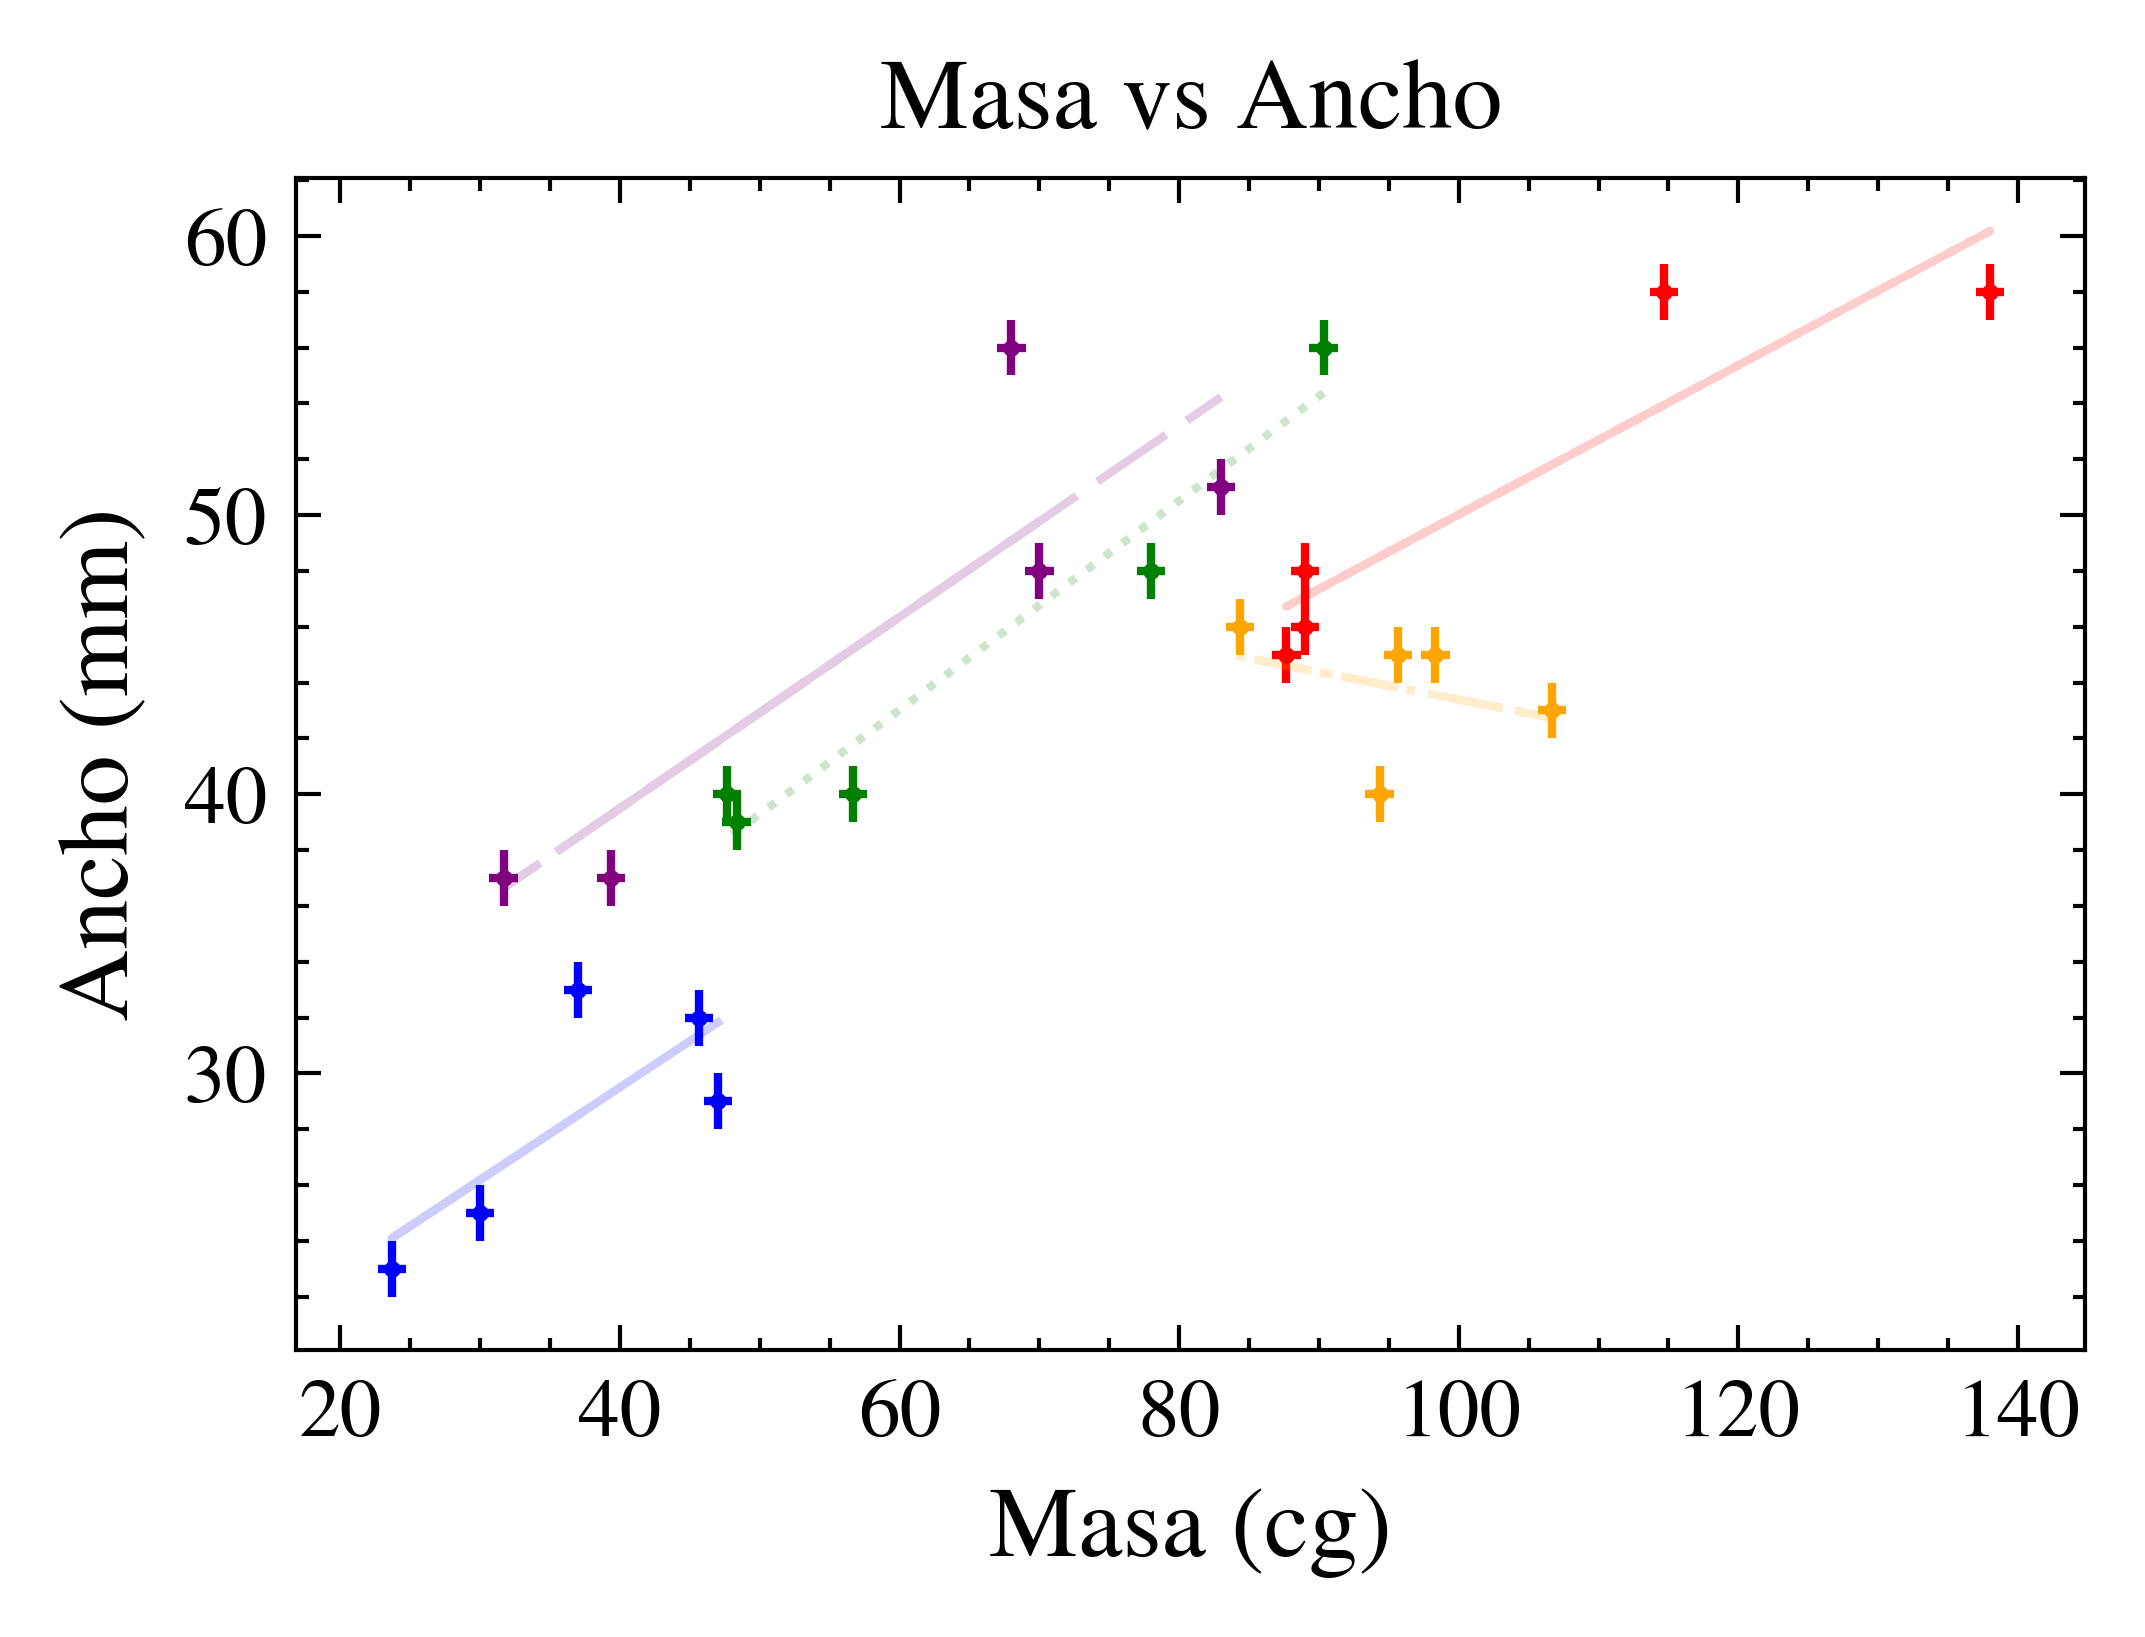

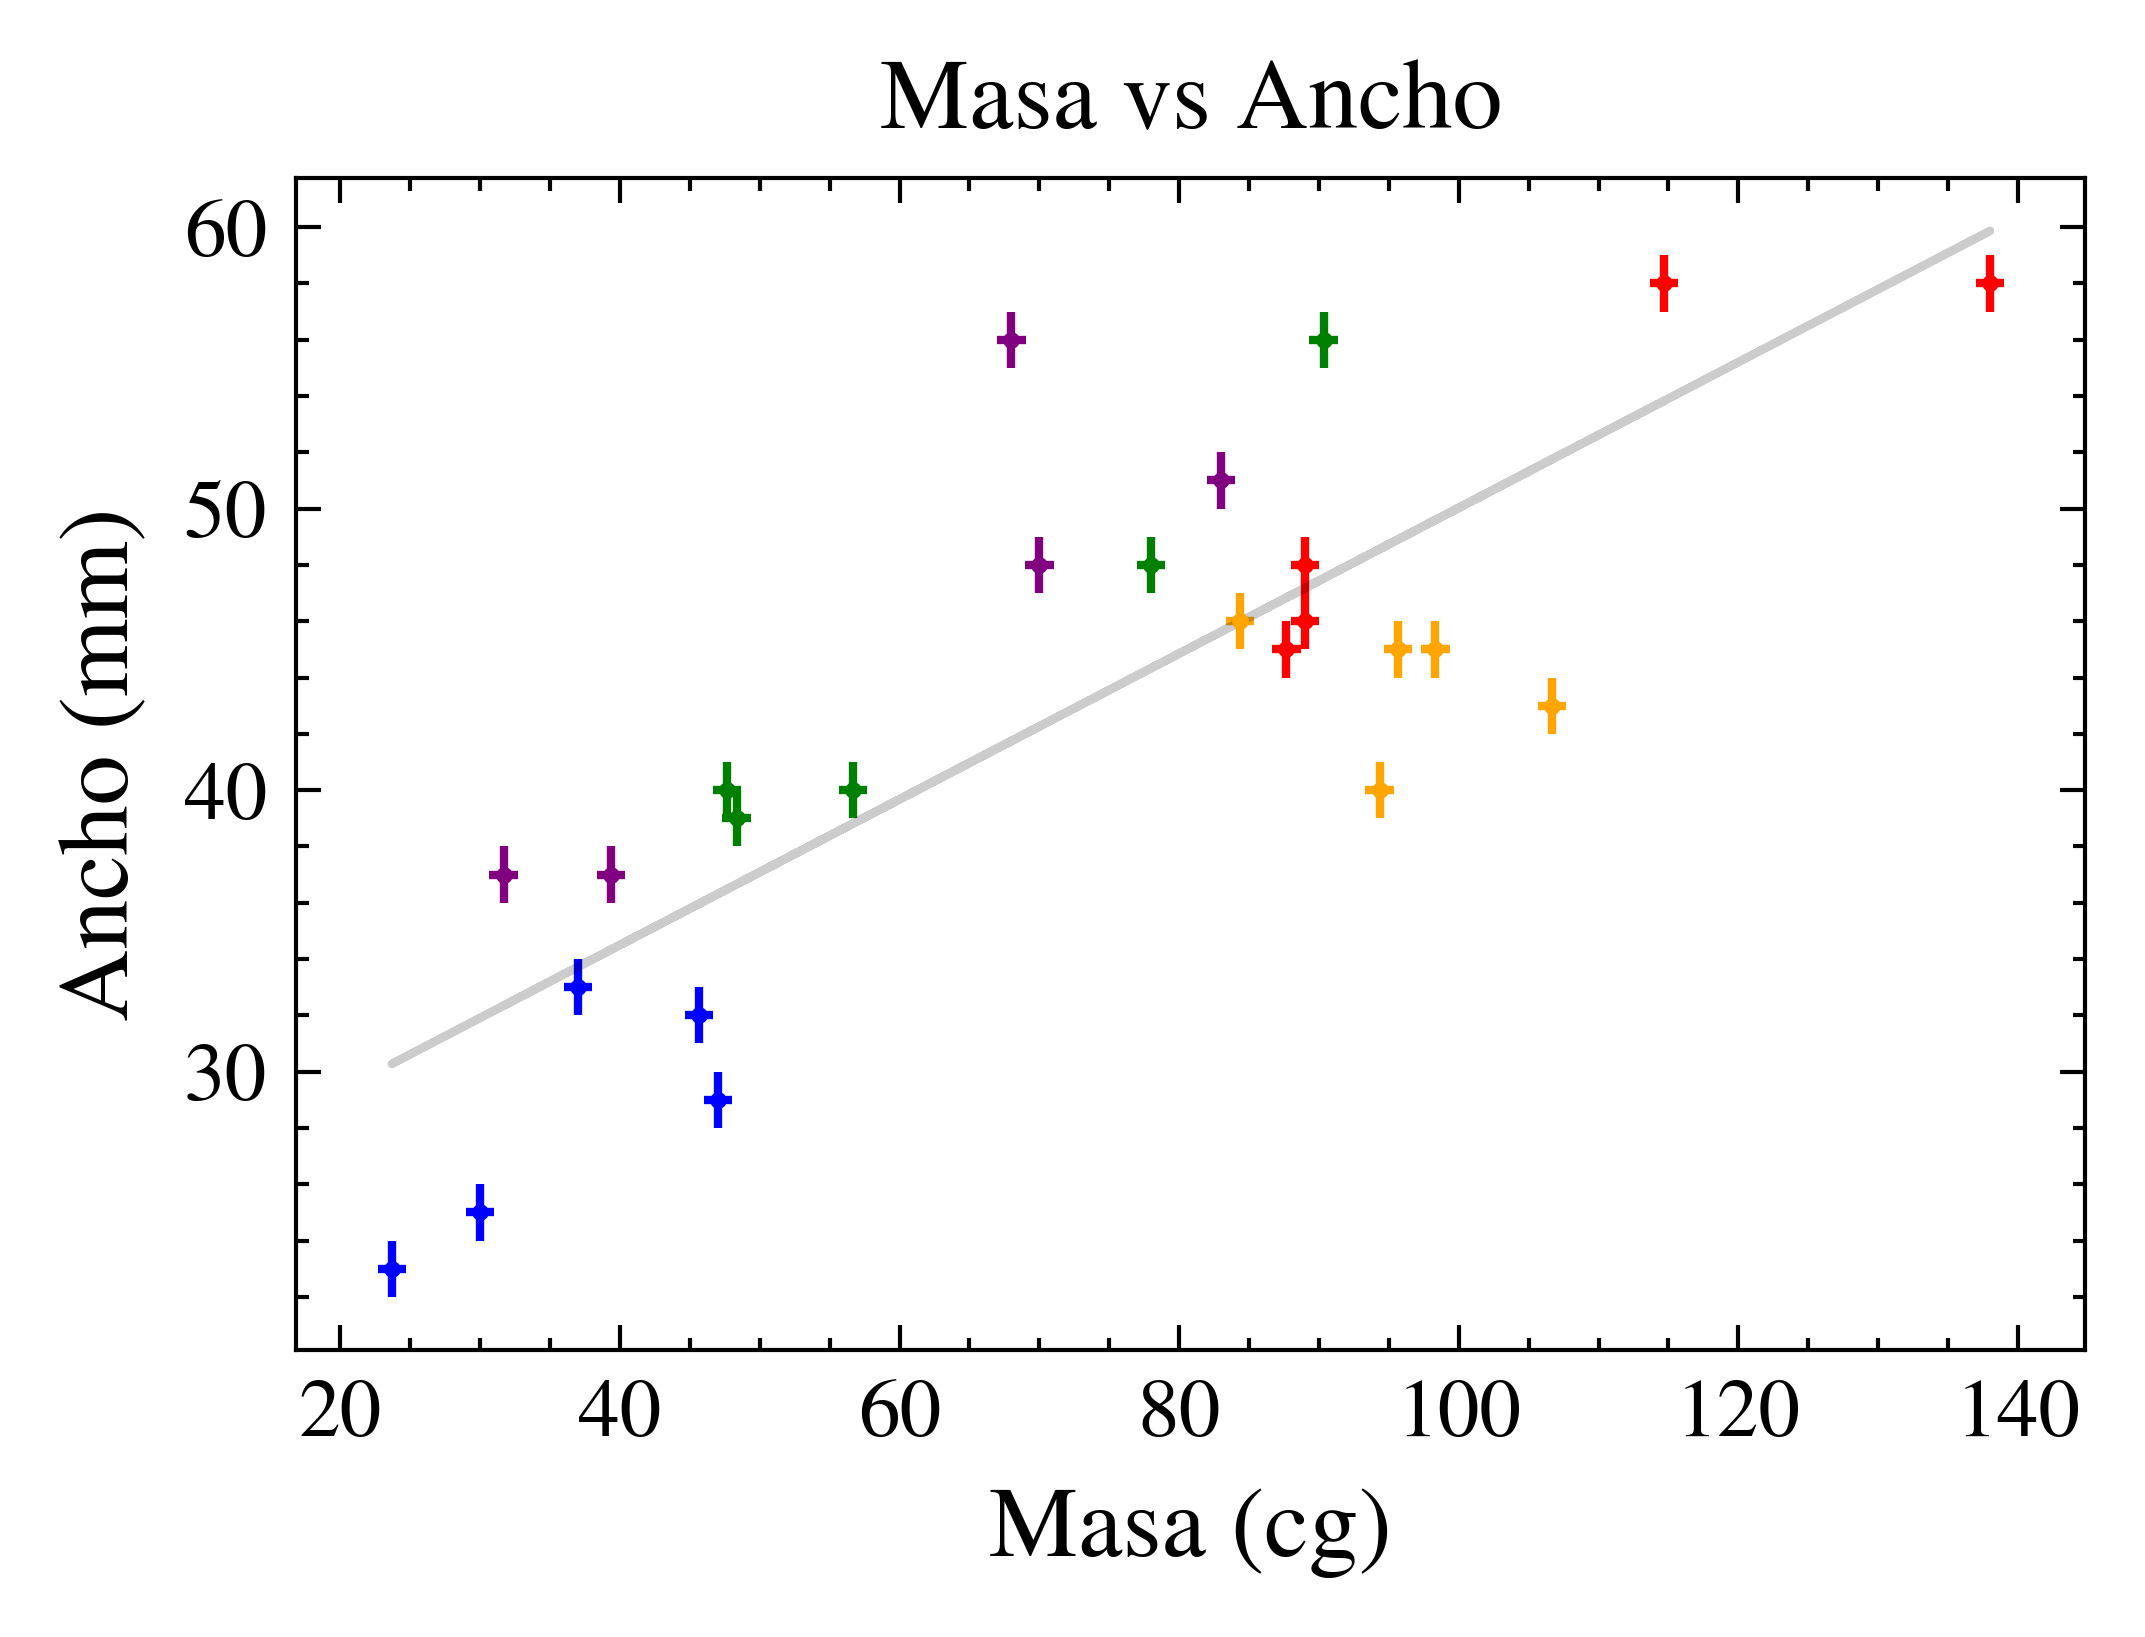

In [130]:
for clase in clases:
    massError = (sistematicWeightError**2 + sigmaWeightMeanError**2)**0.5
    plt.errorbar(clase[0]['weight']*100, clase[0]['width'], xerr=massError, yerr=tol, fmt='o', label=clase[1], ms=diameter_points, color=clase[2], alpha=1)
    regression_coeffs = np.polyfit(clase[0]['weight']*100, clase[0]['width'], 1)
    regression_line = np.polyval(regression_coeffs, clase[0]['weight']*100)
    plt.plot(clase[0]['weight']*100, regression_line, label='Regresión lineal', alpha=0.2, color=clase[2])
plt.xlabel('Masa (cg)')
plt.ylabel('Ancho (mm)')
plt.title('Masa vs Ancho')
plt.show()

#plot only one regression
for clase in clases:
    massError = (sistematicWeightError**2 + sigmaWeightMeanError**2)**0.5
    plt.errorbar(clase[0]['weight']*100, clase[0]['width'], xerr=massError, yerr=tol, fmt='o', label=clase[1], ms=diameter_points, color=clase[2], alpha=1)
regression_coeffs = np.polyfit(df['weight']*100, df['width'], 1)
regression_line = np.polyval(regression_coeffs, df['weight']*100)
plt.plot(df['weight']*100, regression_line, label='Regresión lineal', alpha=0.2, color='black')
plt.xlabel('Masa (cg)')
plt.ylabel('Ancho (mm)')
plt.title('Masa vs Ancho')
plt.show()

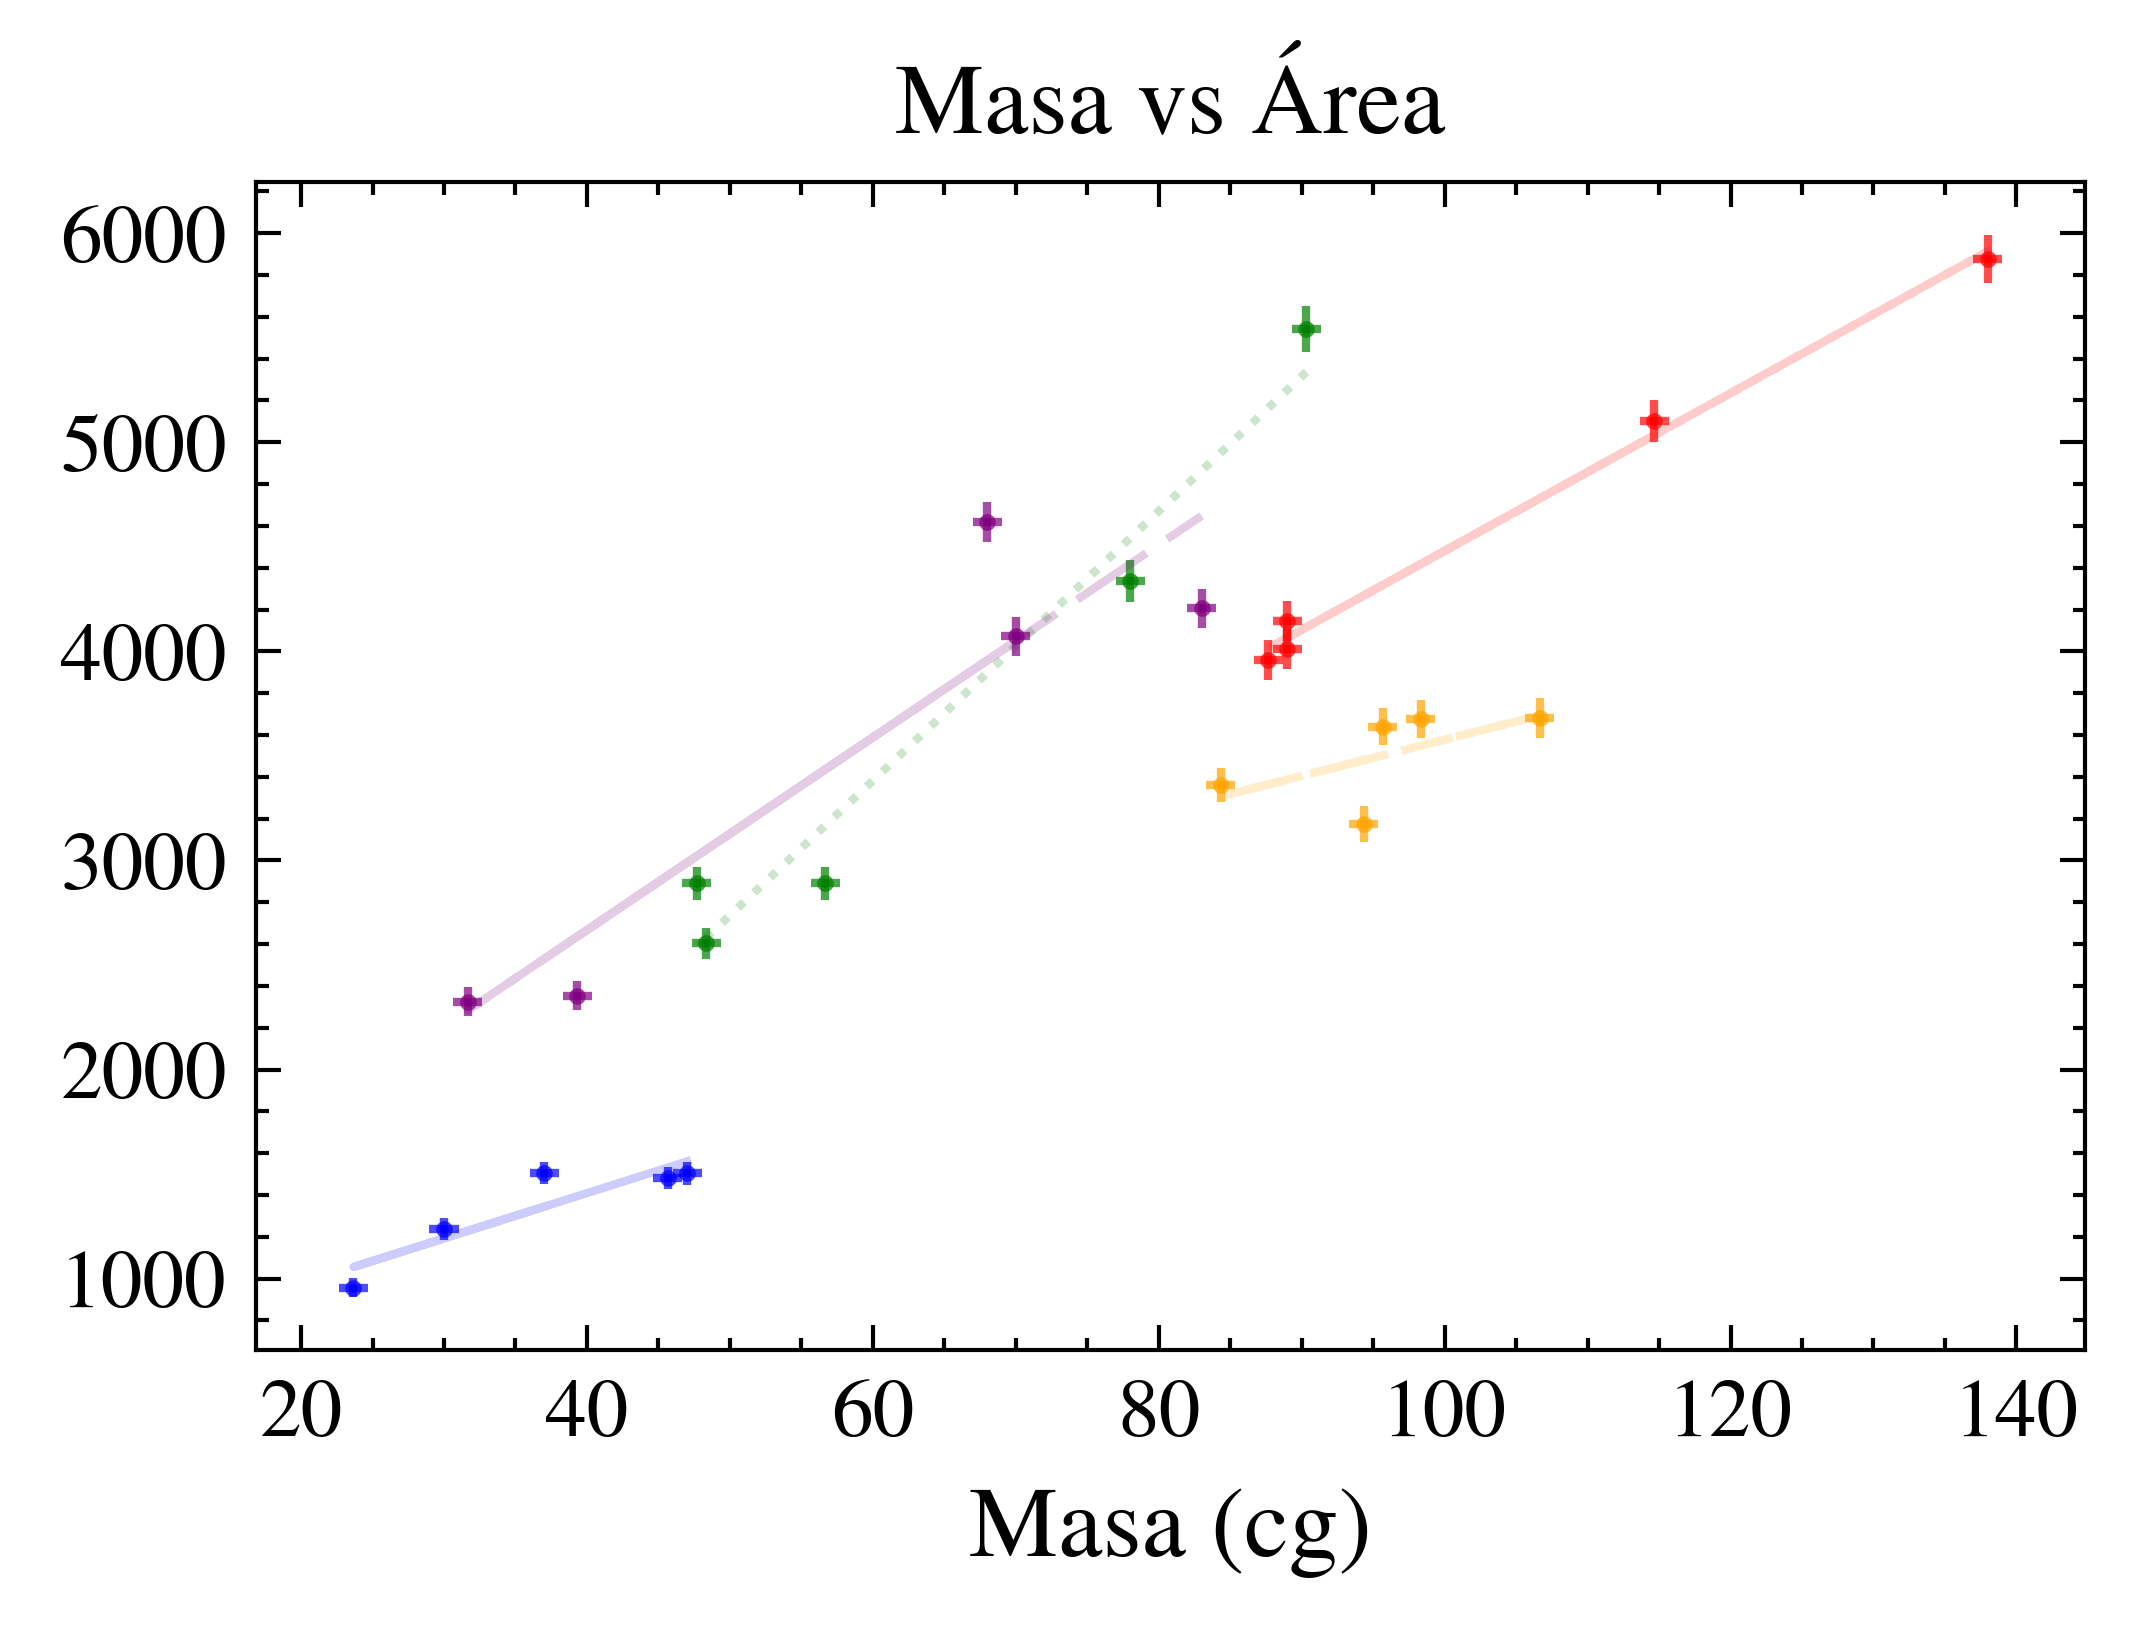

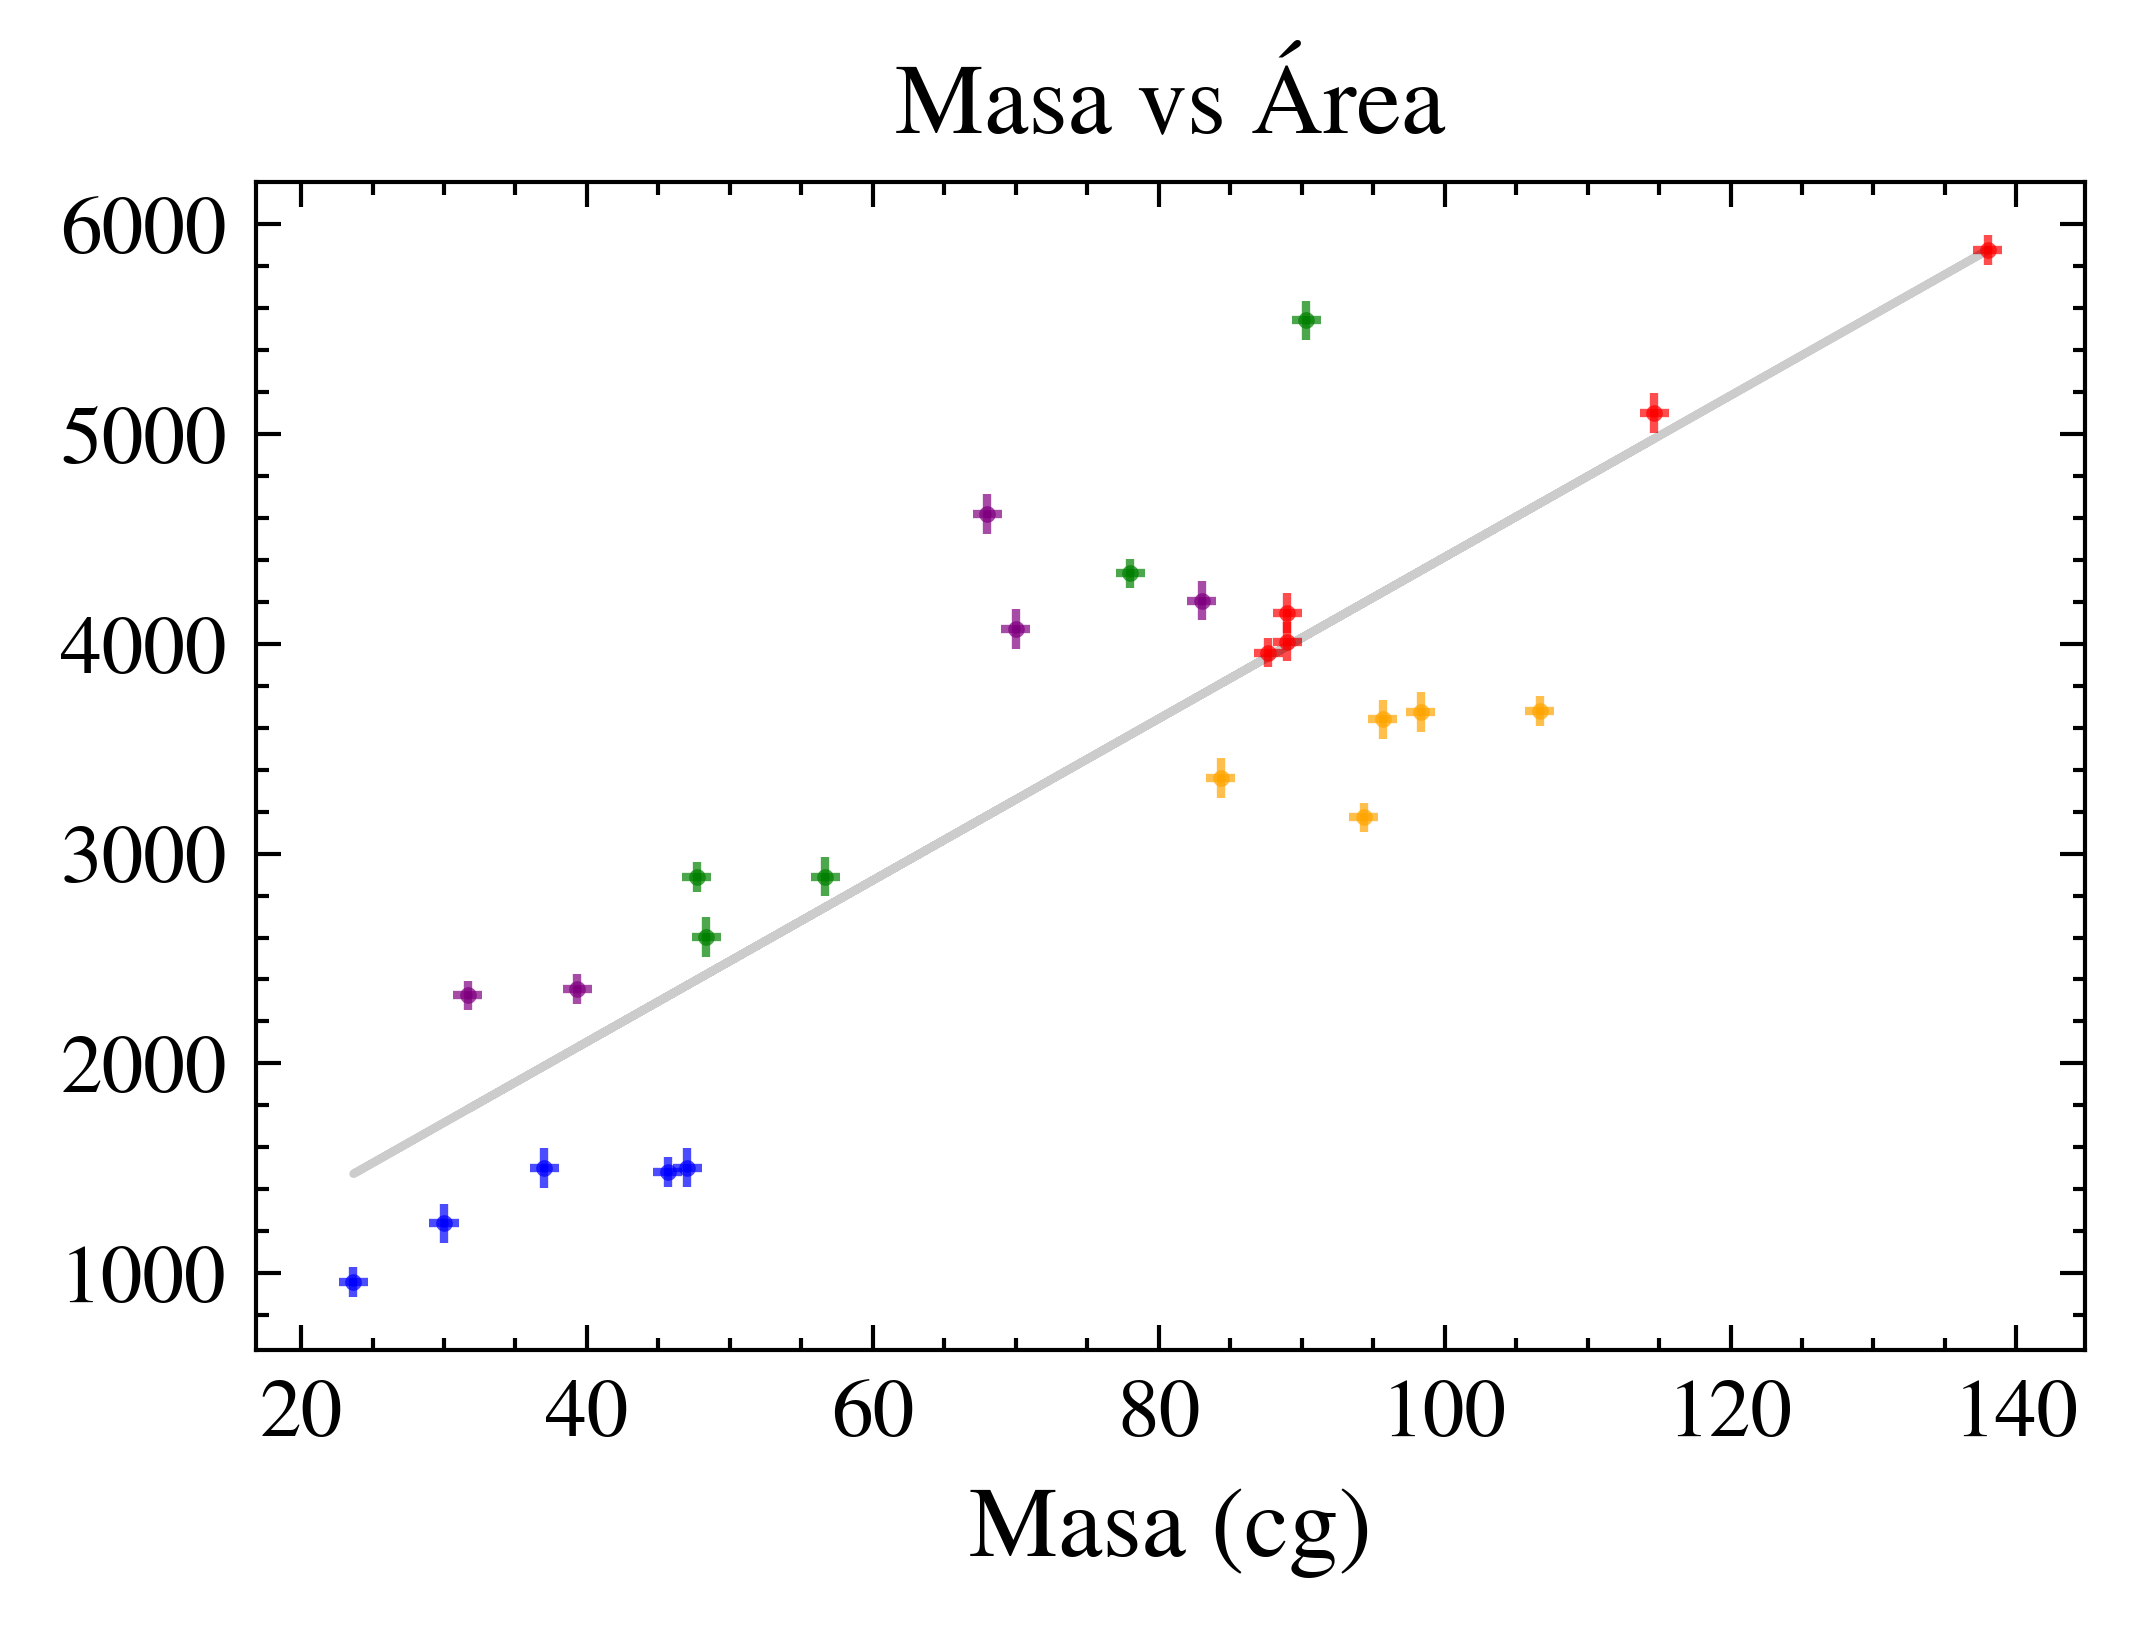

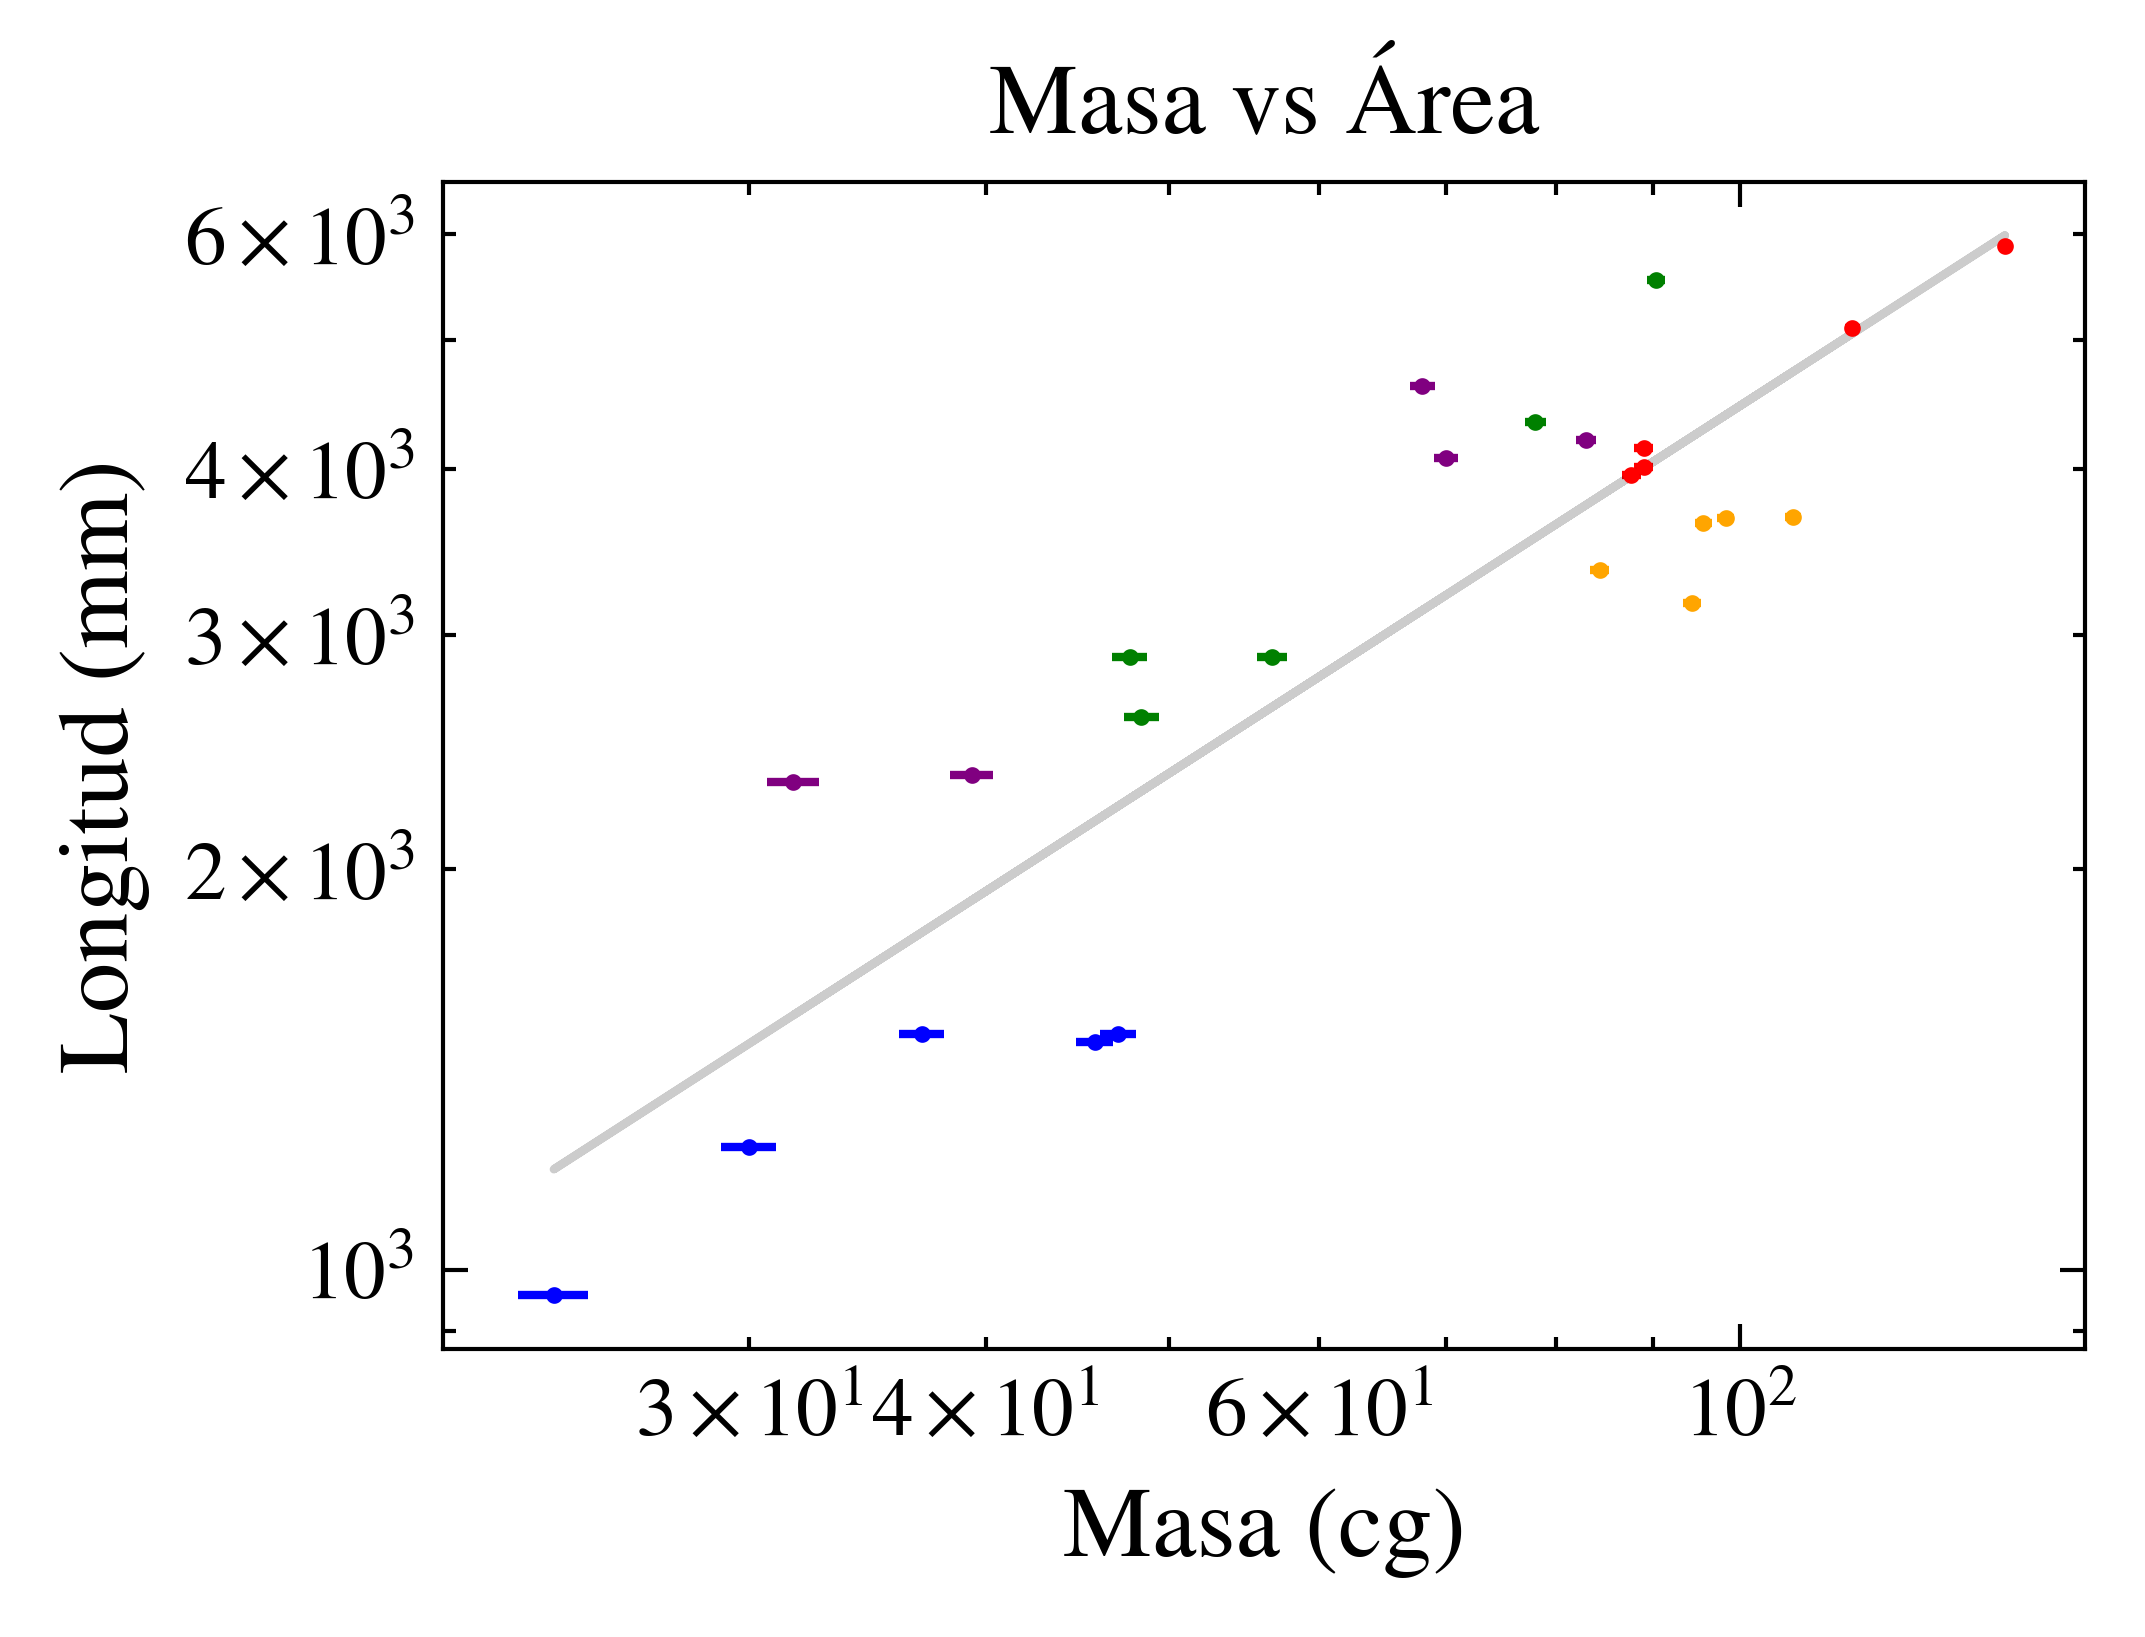

In [137]:
tol = 1 #Absolut error of each sample (width and lenght) (mm)

for clase in clases:
    sigmaArea = [((1/4 * b0 * np.pi)**2 * tol**2 +  (1/4 * a0 * np.pi)**2 * tol**2)**0.5 for a0, b0 in zip(clase[0]['width'], clase[0]['length'])]
    tol = ((sistematicWeightError)**2 + sigmaWeightMeanError**2)**0.5
    plt.errorbar(clase[0]['weight']*100, clase[0]['area'], yerr=sigmaArea, xerr=tol, fmt='o', label=clase[1], ms=diameter_points, color=clase[2], alpha=0.7)
    regression_coeffs = np.polyfit(clase[0]['weight']*100, clase[0]['area'], 1)
    regression_line = np.polyval(regression_coeffs, clase[0]['weight']*100)
    plt.plot(clase[0]['weight']*100, regression_line, label='Linear Regression', alpha=0.2, color=clase[2])
plt.xlabel('Masa (cg)')
plt.title('Masa vs Área')
plt.show()

#plot only one regression
for clase in clases:
    plt.errorbar(clase[0]['weight']*100, clase[0]['area'], yerr=sigmaArea, xerr=tol, fmt='o', label=clase[1], ms=diameter_points, color=clase[2], alpha=0.7)
regression_coeffs = np.polyfit(df['weight']*100, df['area'], 1)
regression_line = np.polyval(regression_coeffs, df['weight']*100)
plt.plot(df['weight']*100, regression_line, label='Linear Regression', alpha=0.2, color='black')
plt.xlabel('Masa (cg)')
plt.title('Masa vs Área')
plt.show()


#regresión log log
for clase in clases:
    massError = (sistematicWeightError**2 + sigmaWeightMeanError**2)**0.5
    plt.errorbar(clase[0]['weight'] * 100, clase[0]['area'], xerr=massError, yerr=tol, fmt='o', label=clase[1], ms=diameter_points, color=clase[2], alpha=1)
combined_weights = np.concatenate([clase[0]['weight'] * 100 for clase in clases])
combined_areas = np.concatenate([clase[0]['area'] for clase in clases])
regression_coeffs = np.polyfit(np.log(combined_weights), np.log(combined_areas), 1)
regression_line = np.polyval(regression_coeffs, np.log(combined_weights))

regression_line_original = np.exp(regression_line)

plt.plot(combined_weights, regression_line_original, label='Regresión lineal', alpha=0.2, color='black')
plt.xlabel('Masa (cg)')
plt.ylabel('Longitud (mm)')
plt.title('Masa vs Área')
plt.xscale('log')
plt.yscale('log')
plt.show()



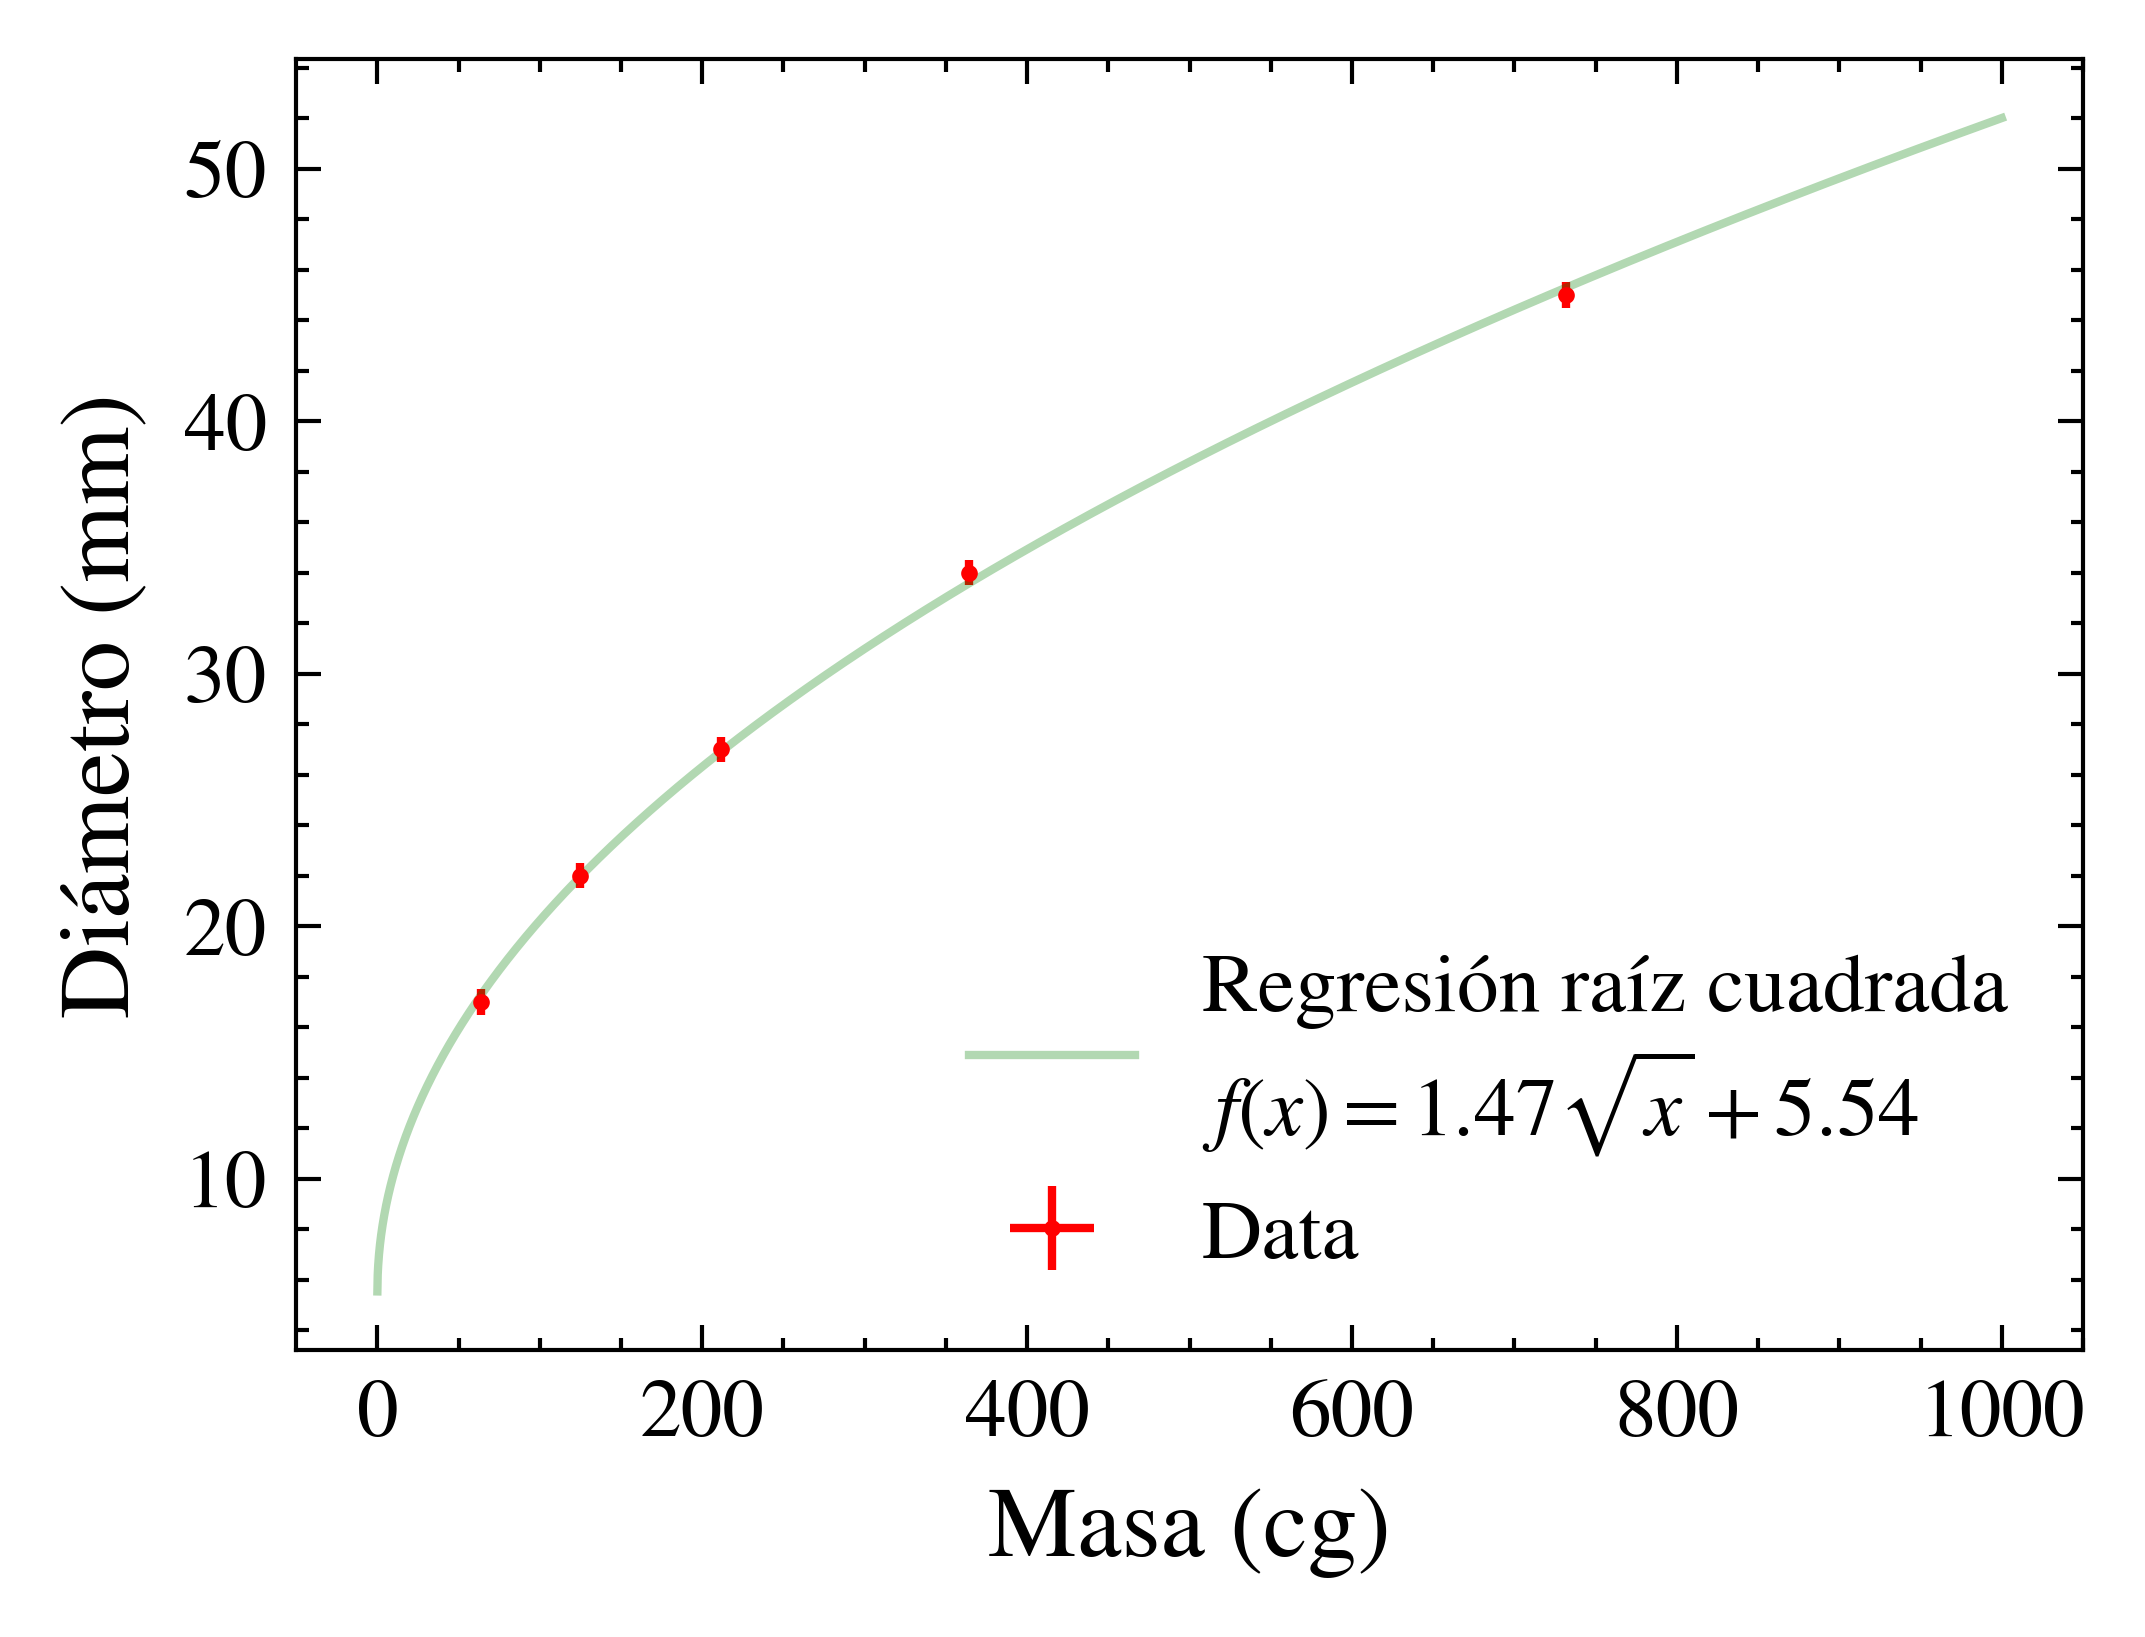

In [132]:
#regresion raiz cuadrada
from scipy.optimize import curve_fit

def square(x, a, b):
    return a*x**0.5 + b

def linear(x, a, b):
    return a*x + b

def cuadratic(x, a, b, c):
    return a*x**2 + b*x + c

balls = pd.read_csv('balls.csv')

# Linear regression of the diameter with respect to the mass
plt.errorbar(balls['mass']*100, balls['diameter'], xerr=massError, yerr=0.5, fmt='o', label='Data', ms=diameter_points, color='red')
xfit = np.linspace(0, 1000, 10000)
# poptl, pcovl = curve_fit(linear, balls['mass']*100, balls['diameter'])
# # plt.plot(xfit, linear(xfit, *poptl), label='Linear Regression', color='blue', alpha=0.3)
popt, pcov = curve_fit(square, balls['mass']*100, balls['diameter'])
plt.plot(xfit, square(xfit, *popt), label='Regresión raíz cuadrada'+f'\n$f(x)={round(popt[0], 2)} \sqrt{{x}}+ {round(popt[1], 2)}$', color='green', alpha=0.3)
# poptc, pcovc = curve_fit(cuadratic, balls['mass']*100, balls['diameter'])
# plt.plot(xfit, cuadratic(xfit, *poptc), label='Regresión cuadrática'+f'\n$f(x)={round(poptc[0], 2)} x^2+ {round(poptc[1], 2)}x + {round(poptc[2], 2)}$', color='purple', alpha=0.3)
# pope, ppcove = curve_fit(exponential, balls['mass']*100, balls['diameter'])
plt.xlabel('Masa (cg)')
plt.ylabel('Diámetro (mm)')
plt.legend()
plt.show()

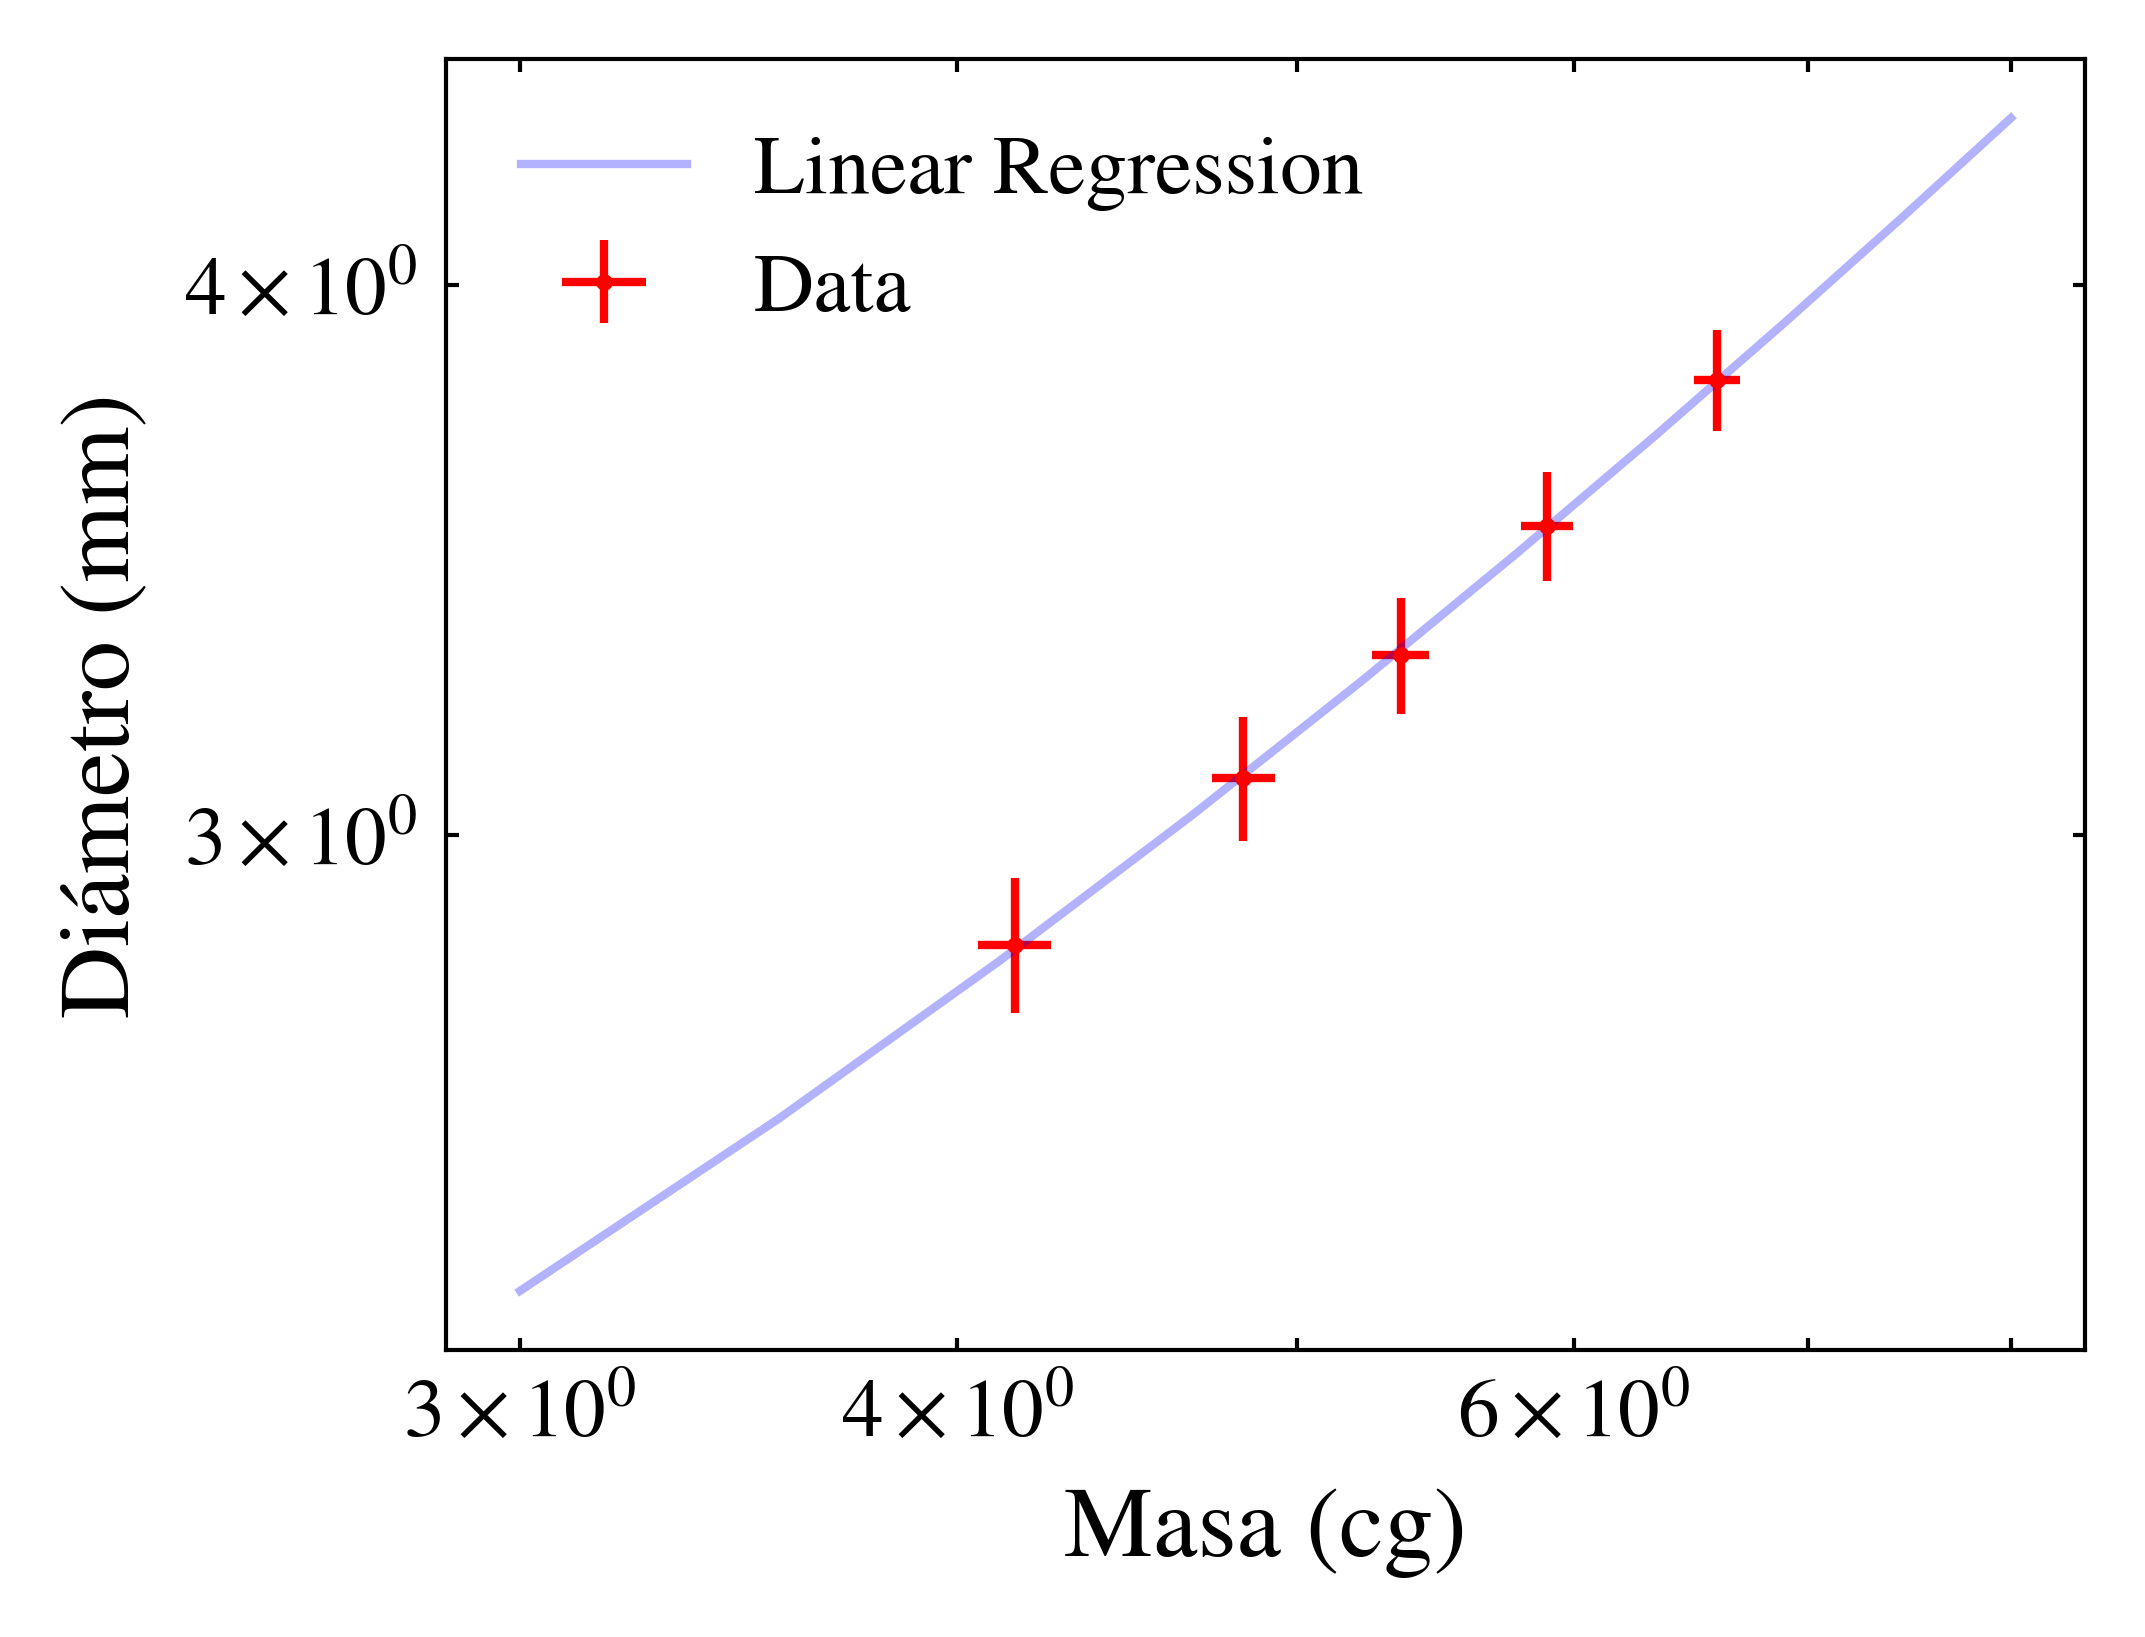

In [133]:
#hacemos lo mismo pero con el log de los datos
logmass = np.log(balls['mass']*100)
logdiameter = np.log(balls['diameter'])
logdiam = 0.1
plt.errorbar(logmass, logdiameter, xerr=0.1, yerr=logdiam, fmt='o', label='Data', ms=diameter_points, color='red')
xfit = np.linspace(3, 8, 10)
poptl, pcovl = curve_fit(linear, logmass, logdiameter)
plt.plot(xfit, linear(xfit, *poptl), label='Regresión lineal', color='blue', alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Masa (cg)')
plt.ylabel('Diámetro (mm)')
plt.legend()
plt.show()






